In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [121]:
df=pd.read_excel("aa.xlsx")

In [122]:
df

Seat No                    Name Mother's Name      PRN No  \
0     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
1     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
2     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
3     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
4     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
...       ...                     ...           ...         ...   
4285  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4286  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4287  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4288  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4289  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   

                                           SUBJECT NAME         CODE CIE ESE  \
0                                BASIC PROGRAMMING IN C   BSC-DS101T  12  26   
1                            DATABASE MANAGEMENT SYSTEM   BSC-DS102T  12  24   
2                    ELEMENTS OF INFORMATION TECHNOLOGY   BSC-DS103T  12  19   
3                         INTRODUCTION TO R PROGRAMMING   BSC-DS104T  10  20   
4                                  INTRODUCTION TO DATA   BSC-DS105T  11  26   
...                                                 ...          ...  ..  ..   
4285                                  LAB COURSE ON 503  BSC-DS 507P  14  33   
4286                     ARTIFICIAL INTELLIGENCE ETHICS  BSC-DS 509T  10  34   
4287                                  LAB COURSE ON 509  BSC-DS 510P  14  32   
4288  COMPLETION OF SKILL-BASED CERTIFICATE\nCOURSE ...          NaN   -   -   
4289                                      SURVEY REPORT       ACUG-K   -   -   

     TOT  GR  ...    PT Total Marks  Percentage  CGPA  Result  Gender  \
0     38  A+  ...   9.0      2831.0       78.64  8.77    Pass  Female   
1     36   A  ...   8.0      2831.0       78.64  8.77    Pass  Female   
2     31   A  ...   8.0      2831.0       78.64  8.77    Pass  Female   
3     30   A  ...   8.0      2831.0       78.64  8.77    Pass  Female   
4     37  A+  ...   9.0      2831.0       78.64  8.77    Pass  Female   
...   ..  ..  ...   ...         ...         ...   ...     ...     ...   
4285  47   O  ...  10.0      2693.0       74.81  8.51    Pass  Female   
4286  44  A+  ...   9.0      2693.0       74.81  8.51    Pass  Female   
4287  46   O  ...  10.0      2693.0       74.81  8.51    Pass  Female   
4288   -  SA  ...     -      2693.0       74.81  8.51    Pass  Female   
4289   -  SA  ...     -      2693.0       74.81  8.51    Pass  Female   

     Semester  Backlog       Type Overall Category  
0           1       No     Theory      Distinction  
1           1       No     Theory      Distinction  
2           1       No     Theory      Distinction  
3           1       No     Theory      Distinction  
4           1       No     Theory      Distinction  
...       ...      ...        ...              ...  
4285        5       No  Practical      Distinction  
4286        5       No     Theory      Distinction  
4287        5       No  Practical      Distinction  
4288        5       No      Other      Distinction  
4289        5       No      Other      Distinction  

[4290 rows x 21 columns]

In [123]:
df.rename(columns={
    'CIE': 'Internal',
    'ESE': 'External',
    'TOT': 'Total',
    'GR': 'Grade',
    'CR': 'Credit',
    'PT': 'Point'
}, inplace=True)


In [124]:
df.dtypes

Seat No               int64
Name                 object
Mother's Name        object
PRN No               object
SUBJECT NAME         object
CODE                 object
Internal             object
External             object
Total                object
Grade                object
Credit               object
Point                object
Total Marks         float64
Percentage          float64
CGPA                float64
Result               object
Gender               object
Semester              int64
Backlog              object
Type                 object
Overall Category     object
dtype: object

In [125]:
print(df['Grade'].unique())

['A+' 'A' 'SA' 'B+' 'B' 'C' 'O' 'D' 'F']


In [126]:
df["Grade"].value_counts()

Grade
A+    1308
A     1202
B+     504
O      462
B      316
SA     260
C      218
D       19
F        1
Name: count, dtype: int64

In [127]:
df = df.dropna(subset=['Grade'])
df = df[df['Grade'] != 'SA']
print("Unique Grades after cleaning:", df['Grade'].unique())

Unique Grades after cleaning: ['A+' 'A' 'B+' 'B' 'C' 'O' 'D' 'F']


In [128]:
cols_to_convert = ['Internal', 'External', 'Total', 'Credit', 'Point']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
print("Cleaned Data shape:", df.shape)
df.tail()

Cleaned Data shape: (4030, 21)


Seat No                    Name Mother's Name      PRN No  \
4283  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4284  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4285  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4286  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4287  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   

                        SUBJECT NAME         CODE  Internal  External  Total  \
4283               LAB COURSE ON 501  BSC-DS 505P        12        26     38   
4284               LAB COURSE ON 502  BSC-DS 506P        14        34     48   
4285               LAB COURSE ON 503  BSC-DS 507P        14        33     47   
4286  ARTIFICIAL INTELLIGENCE ETHICS  BSC-DS 509T        10        34     44   
4287               LAB COURSE ON 509  BSC-DS 510P        14        32     46   

     Grade  ...  Point  Total Marks  Percentage  CGPA  Result  Gender  \
4283    A+  ...      9       2693.0       74.81  8.51    Pass  Female   
4284     O  ...     10       2693.0       74.81  8.51    Pass  Female   
4285     O  ...     10       2693.0       74.81  8.51    Pass  Female   
4286    A+  ...      9       2693.0       74.81  8.51    Pass  Female   
4287     O  ...     10       2693.0       74.81  8.51    Pass  Female   

     Semester  Backlog       Type Overall Category  
4283        5       No  Practical      Distinction  
4284        5       No  Practical      Distinction  
4285        5       No  Practical      Distinction  
4286        5       No     Theory      Distinction  
4287        5       No  Practical      Distinction  

[5 rows x 21 columns]

In [129]:
df.dtypes

Seat No               int64
Name                 object
Mother's Name        object
PRN No               object
SUBJECT NAME         object
CODE                 object
Internal              int32
External              int32
Total                 int32
Grade                object
Credit                int32
Point                 int32
Total Marks         float64
Percentage          float64
CGPA                float64
Result               object
Gender               object
Semester              int64
Backlog              object
Type                 object
Overall Category     object
dtype: object

In [130]:
df.dtypes

Seat No               int64
Name                 object
Mother's Name        object
PRN No               object
SUBJECT NAME         object
CODE                 object
Internal              int32
External              int32
Total                 int32
Grade                object
Credit                int32
Point                 int32
Total Marks         float64
Percentage          float64
CGPA                float64
Result               object
Gender               object
Semester              int64
Backlog              object
Type                 object
Overall Category     object
dtype: object

In [131]:
df["Grade"].value_counts()

Grade
A+    1308
A     1202
B+     504
O      462
B      316
C      218
D       19
F        1
Name: count, dtype: int64

In [132]:
df.columns

Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')

In [133]:
df.tail()

Seat No                    Name Mother's Name      PRN No  \
4283  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4284  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4285  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4286  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4287  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   

                        SUBJECT NAME         CODE  Internal  External  Total  \
4283               LAB COURSE ON 501  BSC-DS 505P        12        26     38   
4284               LAB COURSE ON 502  BSC-DS 506P        14        34     48   
4285               LAB COURSE ON 503  BSC-DS 507P        14        33     47   
4286  ARTIFICIAL INTELLIGENCE ETHICS  BSC-DS 509T        10        34     44   
4287               LAB COURSE ON 509  BSC-DS 510P        14        32     46   

     Grade  ...  Point  Total Marks  Percentage  CGPA  Result  Gender  \
4283    A+  ...      9       2693.0       74.81  8.51    Pass  Female   
4284     O  ...     10       2693.0       74.81  8.51    Pass  Female   
4285     O  ...     10       2693.0       74.81  8.51    Pass  Female   
4286    A+  ...      9       2693.0       74.81  8.51    Pass  Female   
4287     O  ...     10       2693.0       74.81  8.51    Pass  Female   

     Semester  Backlog       Type Overall Category  
4283        5       No  Practical      Distinction  
4284        5       No  Practical      Distinction  
4285        5       No  Practical      Distinction  
4286        5       No     Theory      Distinction  
4287        5       No  Practical      Distinction  

[5 rows x 21 columns]

In [134]:
df.shape

(4030, 21)

In [135]:
df.isna().sum()

Seat No              0
Name                 0
Mother's Name        0
PRN No               0
SUBJECT NAME         0
CODE                 1
Internal             0
External             0
Total                0
Grade                0
Credit               0
Point                0
Total Marks         62
Percentage           0
CGPA                62
Result              62
Gender               0
Semester             0
Backlog              0
Type                 0
Overall Category     0
dtype: int64

In [136]:
df.duplicated().sum()

0

In [137]:
df.dropna(inplace=True)

In [138]:
df.isna().sum()

Seat No             0
Name                0
Mother's Name       0
PRN No              0
SUBJECT NAME        0
CODE                0
Internal            0
External            0
Total               0
Grade               0
Credit              0
Point               0
Total Marks         0
Percentage          0
CGPA                0
Result              0
Gender              0
Semester            0
Backlog             0
Type                0
Overall Category    0
dtype: int64

In [139]:
df.head()

Seat No                    Name Mother's Name      PRN No  \
0  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
1  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
2  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
3  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
4  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   

                         SUBJECT NAME        CODE  Internal  External  Total  \
0              BASIC PROGRAMMING IN C  BSC-DS101T        12        26     38   
1          DATABASE MANAGEMENT SYSTEM  BSC-DS102T        12        24     36   
2  ELEMENTS OF INFORMATION TECHNOLOGY  BSC-DS103T        12        19     31   
3       INTRODUCTION TO R PROGRAMMING  BSC-DS104T        10        20     30   
4                INTRODUCTION TO DATA  BSC-DS105T        11        26     37   

  Grade  ...  Point  Total Marks  Percentage  CGPA  Result  Gender Semester  \
0    A+  ...      9       2831.0       78.64  8.77    Pass  Female        1   
1     A  ...      8       2831.0       78.64  8.77    Pass  Female        1   
2     A  ...      8       2831.0       78.64  8.77    Pass  Female        1   
3     A  ...      8       2831.0       78.64  8.77    Pass  Female        1   
4    A+  ...      9       2831.0       78.64  8.77    Pass  Female        1   

   Backlog    Type Overall Category  
0       No  Theory      Distinction  
1       No  Theory      Distinction  
2       No  Theory      Distinction  
3       No  Theory      Distinction  
4       No  Theory      Distinction  

[5 rows x 21 columns]

# visualize grapgical representation of data

In [141]:
!pip install ydata-profiling

In [142]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 19.30it/s]
C:\Users\ACER\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 2 2 ... 3 1 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\ACER\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 1 0 ... 3 3 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\ACER\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [143]:
from IPython.display import IFrame

In [144]:
IFrame(src='eda_report.html', width=1000, height=600)

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

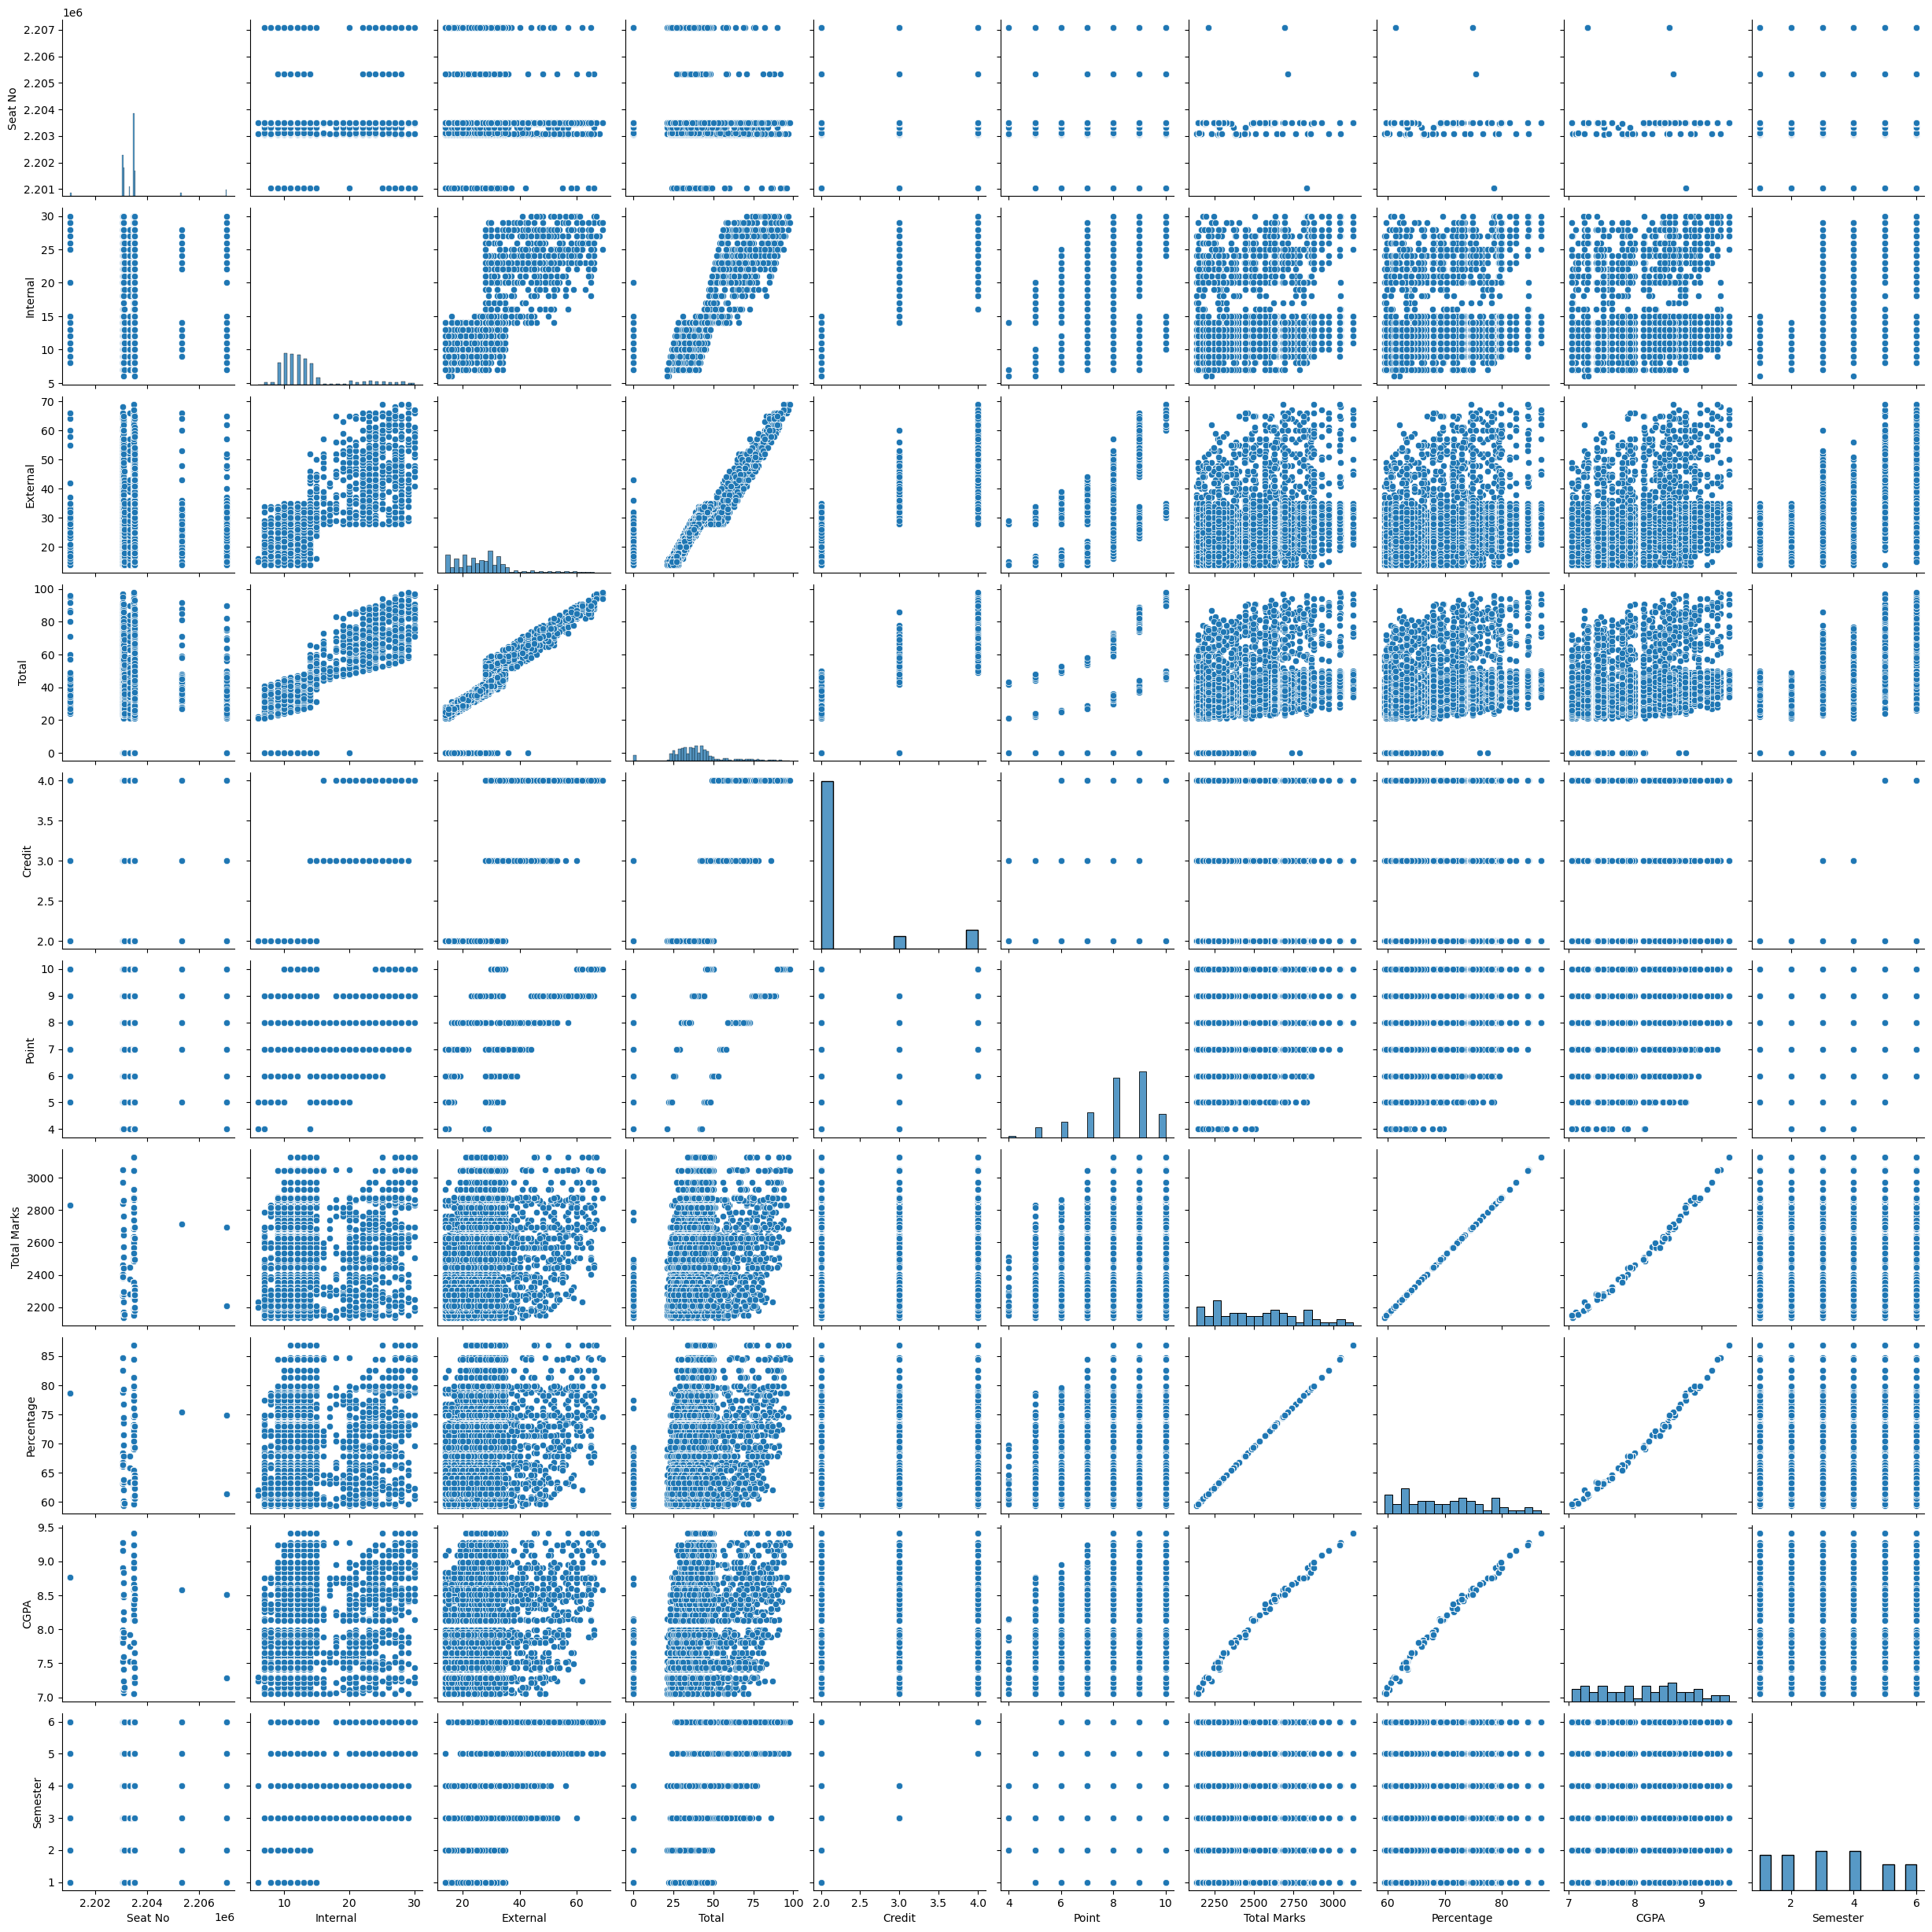

In [146]:
sns.pairplot(df)
plt.show()

In [147]:
# Clean + map Gender
df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize().map({'Female': 0, 'Male': 1})

# Clean + map Result
df['Result'] = df['Result'].astype(str).str.strip().str.capitalize().map({'Pass': 1, 'Fail': 0})

# Clean + map Backlog
df['Backlog'] = df['Backlog'].astype(str).str.strip().str.capitalize().map({'No': 0, 'Yes': 1})

# Clean + map Type
df['Type'] = df['Type'].astype(str).str.strip().str.capitalize().map({'Theory': 1, 'Practical': 2,'Other':0})


#df['Type'] = df['Type'].astype(str).str.strip().str.capitalize().map({'Theory': 1, 'Practical': 2,'Other':0})


In [148]:
df.shape

(3905, 21)

In [149]:
df['Result'].value_counts()

Result
1    3905
Name: count, dtype: int64

In [150]:
df.sample(1)

Seat No                     Name Mother's Name      PRN No  \
3911  2203509  GHADAGE PRANALI NAVNATH       PRAMILA  SU00001834   

        SUBJECT NAME        CODE  Internal  External  Total Grade  ...  Point  \
3911  LINEAR ALGEBRA  BSC-DS206T         7        15     22     C  ...      5   

      Total Marks  Percentage  CGPA  Result  Gender  Semester  Backlog  Type  \
3911       2246.0       62.39  7.43       1       0         2        0     1   

      Overall Category  
3911       First Class  

[1 rows x 21 columns]

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ACER\AppData\Local\Temp\ipykernel_3636\1422110440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Backlog', data=df, palette='viridis')


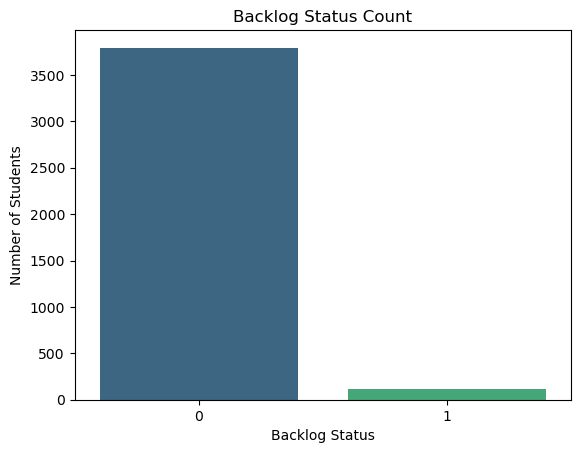

In [152]:
sns.countplot(x='Backlog', data=df, palette='viridis')
plt.xlabel('Backlog Status')
plt.ylabel('Number of Students')
plt.title('Backlog Status Count')
plt.show()

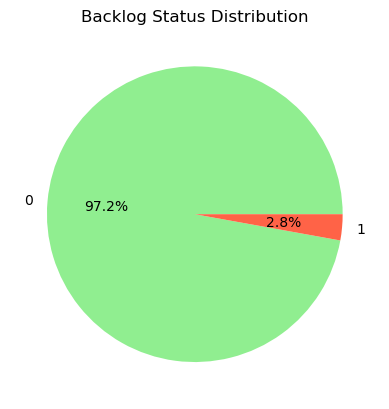

In [153]:
backlog_counts = df['Backlog'].value_counts()
backlog_counts.plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen', 'tomato'])
plt.title('Backlog Status Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()

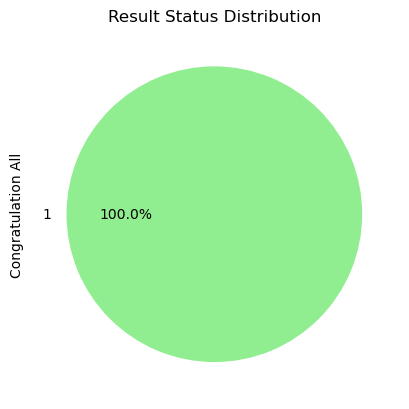

In [154]:
real_status = df['Result'].value_counts()
real_status.plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen', 'tomato'])
plt.title('Result Status Distribution')
plt.ylabel('Congratulation All')  
plt.show()

In [155]:
df.shape

(3905, 21)

C:\Users\ACER\AppData\Local\Temp\ipykernel_3636\4103303243.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


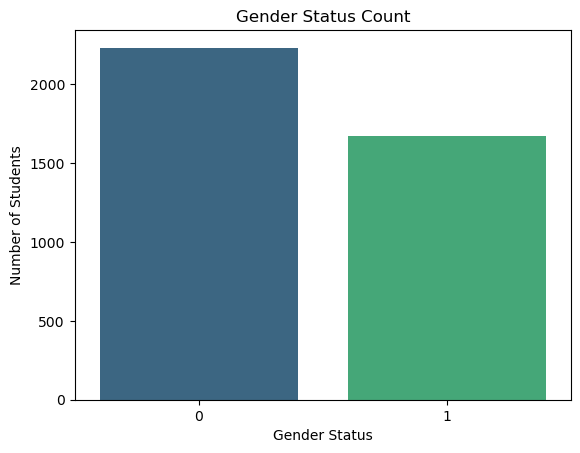

In [156]:
sns.countplot(x='Gender', data=df, palette='viridis')
plt.xlabel('Gender Status')
plt.ylabel('Number of Students')
plt.title('Gender Status Count')
plt.show()

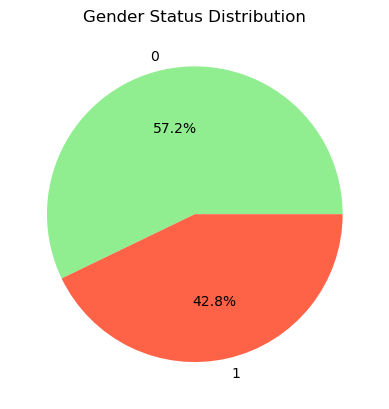

In [157]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen', 'tomato'])
plt.title('Gender Status Distribution')
plt.ylabel('')  
plt.show()

In [158]:
print(df['Name'].nunique())
print(len(df))

63
3905


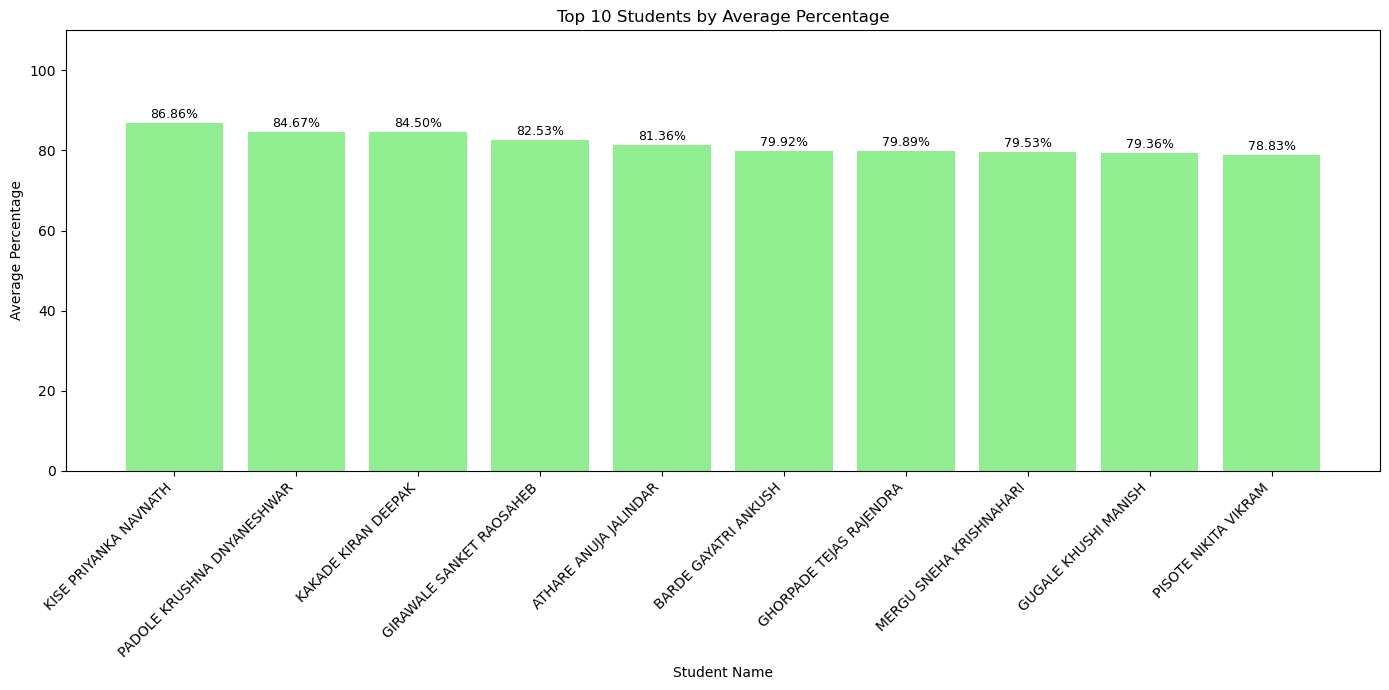

In [159]:
student_avg = df.groupby('Name')['Percentage'].mean().reset_index()
top10 = student_avg.sort_values(by='Percentage', ascending=False).head(10)
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
bars = plt.bar(top10['Name'], top10['Percentage'], color='lightgreen')
plt.title('Top 10 Students by Average Percentage')
plt.xlabel('Student Name')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=9)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()


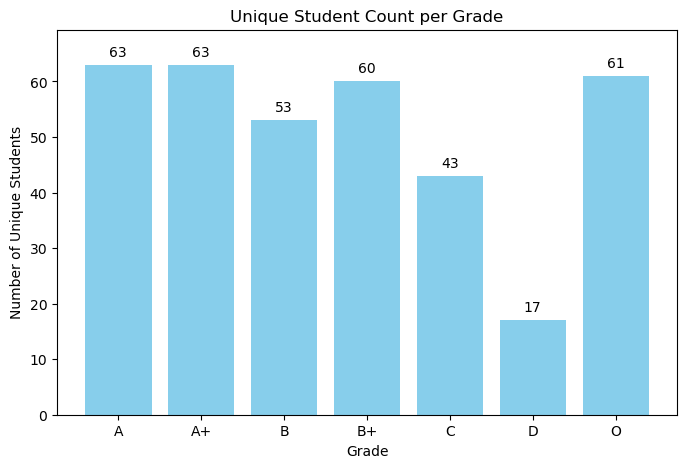

In [160]:
unique_students_per_grade = df.groupby('Grade')['Seat No'].nunique().sort_index()

plt.figure(figsize=(8,5))
bars = plt.bar(unique_students_per_grade.index, unique_students_per_grade.values, color='skyblue')
plt.title('Unique Student Count per Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Unique Students')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.ylim(0, max(unique_students_per_grade.values)*1.1)
plt.show()


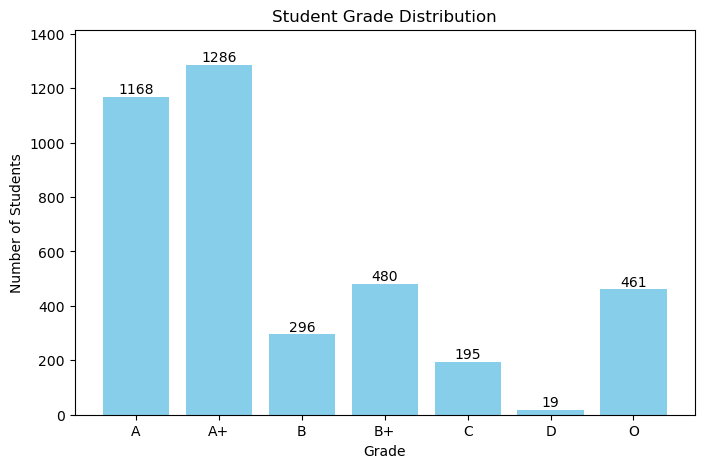

In [161]:
grade_counts = df['Grade'].value_counts().sort_index()  # sorting grades alphabetically
plt.figure(figsize=(8,5))
bars = plt.bar(grade_counts.index, grade_counts.values, color='skyblue')
plt.title('Student Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(grade_counts.values)*1.1)  # Add some space above bars
plt.show()


In [162]:
df.columns

Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')

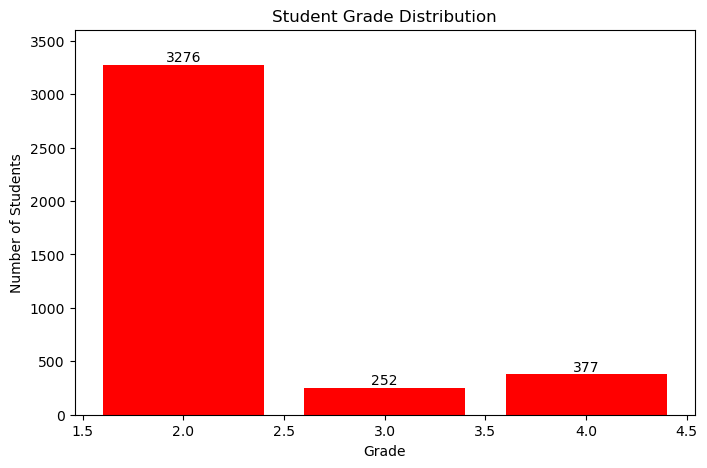

In [163]:
import matplotlib.pyplot as plt

grade_counts = df['Credit'].value_counts().sort_index()  # sorting grades alphabetically

plt.figure(figsize=(8,5))
bars = plt.bar(grade_counts.index, grade_counts.values, color='red')

plt.title('Student Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.ylim(0, max(grade_counts.values)*1.1)  # Add some space above bars
plt.show()

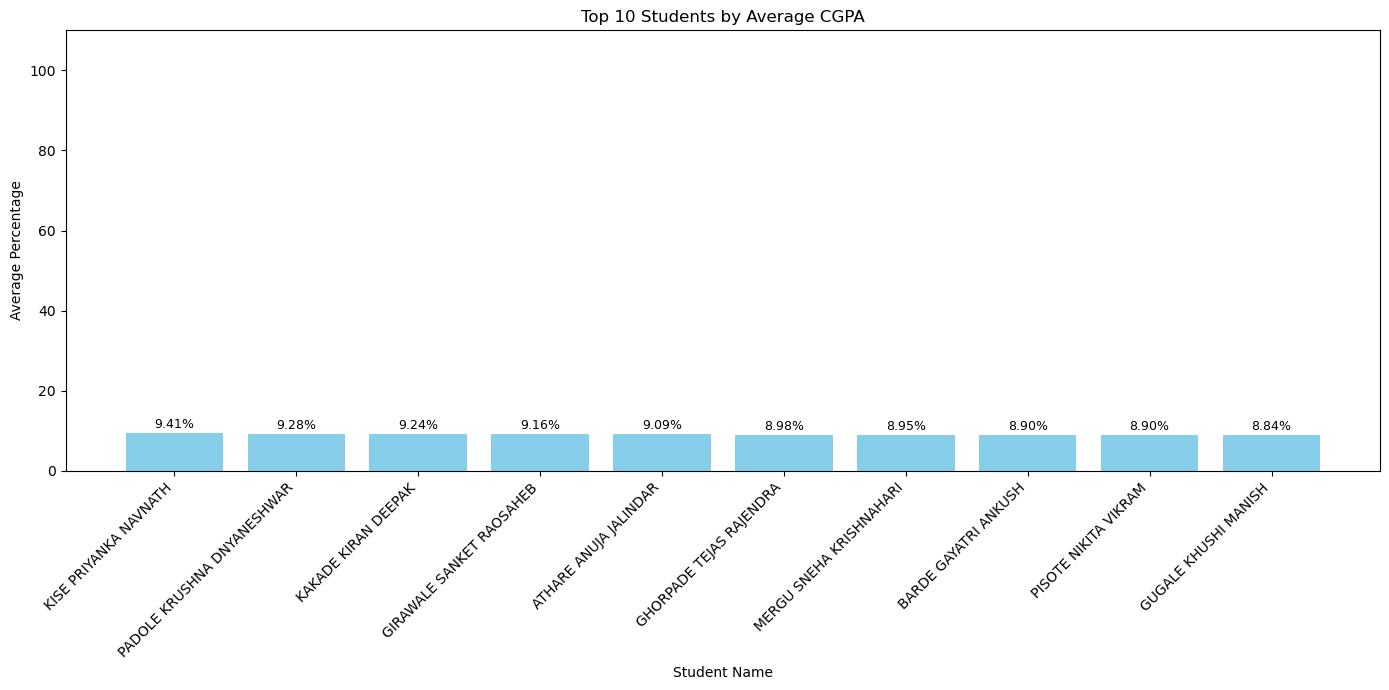

In [164]:
student_avg = df.groupby('Name')['CGPA'].mean().reset_index()
top10 = student_avg.sort_values(by='CGPA', ascending=False).head(10)

plt.figure(figsize=(14,7))
bars = plt.bar(top10['Name'], top10['CGPA'], color='skyblue')

plt.title('Top 10 Students by Average CGPA')
plt.xlabel('Student Name')
plt.ylabel('Average Percentage')

plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 110)
plt.tight_layout()
plt.show()


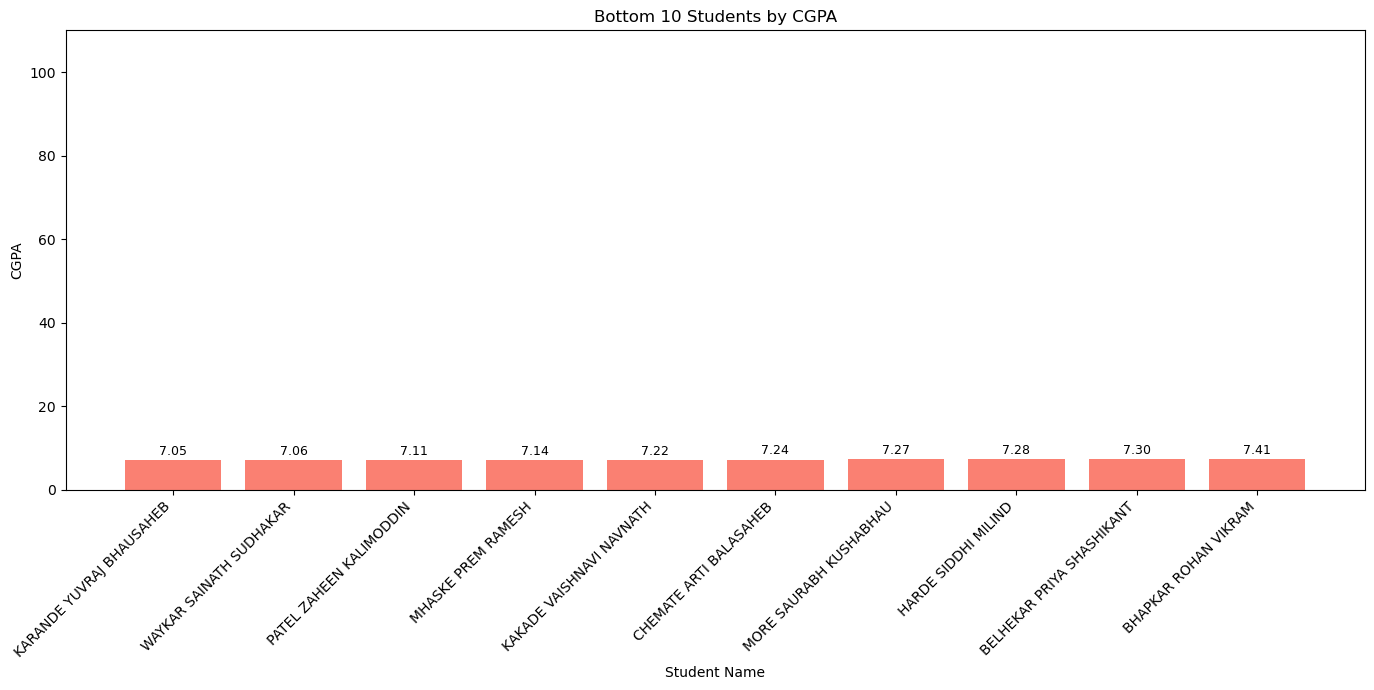

In [165]:
student_avg = df.groupby('Name')['CGPA'].min().reset_index()
bottom10 = student_avg.sort_values(by='CGPA', ascending=True).head(10)

plt.figure(figsize=(14,7))
bars = plt.bar(bottom10['Name'], bottom10['CGPA'], color='salmon')
plt.title('Bottom 10 Students by CGPA')
plt.xlabel('Student Name')
plt.ylabel('CGPA')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 110)
plt.tight_layout()
plt.show()


In [166]:
df.columns

Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')

Top 10 students with most backlogs:
                            Name  Backlog
62       WAYKAR SAINATH SUDHAKAR        8
22           HARDE SIDDHI MILIND        8
41        MORE SAURABH KUSHABHAU        8
9         CHEMATE ARTI BALASAHEB        7
3   BHALEKAR DNYANESHWARI SANJAY        6
45       PATEL ZAHEEN KALIMODDIN        6
15        GAIKWAD KOMAL CHANGDEV        5
27      KAKADE VAISHNAVI NAVNATH        5
29      KARANDE YUVRAJ BHAUSAHEB        4
53           SHELAR RASIKA RAHUL        4


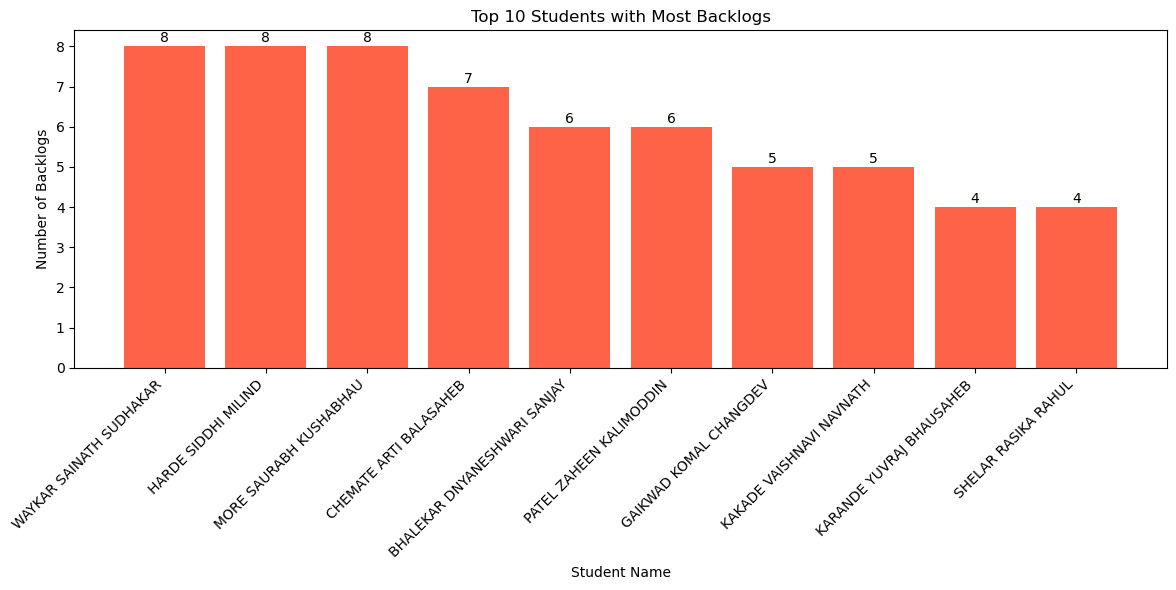

In [167]:
df['Name'] = df['Name'].str.strip()
backlog_counts = df.groupby('Name')['Backlog'].sum().reset_index()

top_10_backlog = backlog_counts.sort_values(by='Backlog', ascending=False).head(10)

print("Top 10 students with most backlogs:")
print(top_10_backlog)

plt.figure(figsize=(12,6))
bars = plt.bar(top_10_backlog['Name'], top_10_backlog['Backlog'], color='tomato')
plt.title('Top 10 Students with Most Backlogs')
plt.xlabel('Student Name')
plt.ylabel('Number of Backlogs')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{int(height)}', ha='center')
plt.tight_layout()
plt.show()

Top 10 students by Percentage:
                            Name  Percentage
2772       KISE PRIYANKA NAVNATH       86.86
330   PADOLE KRUSHNA DNYANESHWAR       84.67
3168         KAKADE KIRAN DEEPAK       84.50
396     GIRAWALE SANKET RAOSAHEB       82.53
3366       ATHARE ANUJA JALINDAR       81.36
2640        BARDE GAYATRI ANKUSH       79.92
3036     GHORPADE TEJAS RAJENDRA       79.89
2112     MERGU SNEHA KRISHNAHARI       79.53
594         GUGALE KHUSHI MANISH       79.36
528         PISOTE NIKITA VIKRAM       78.83


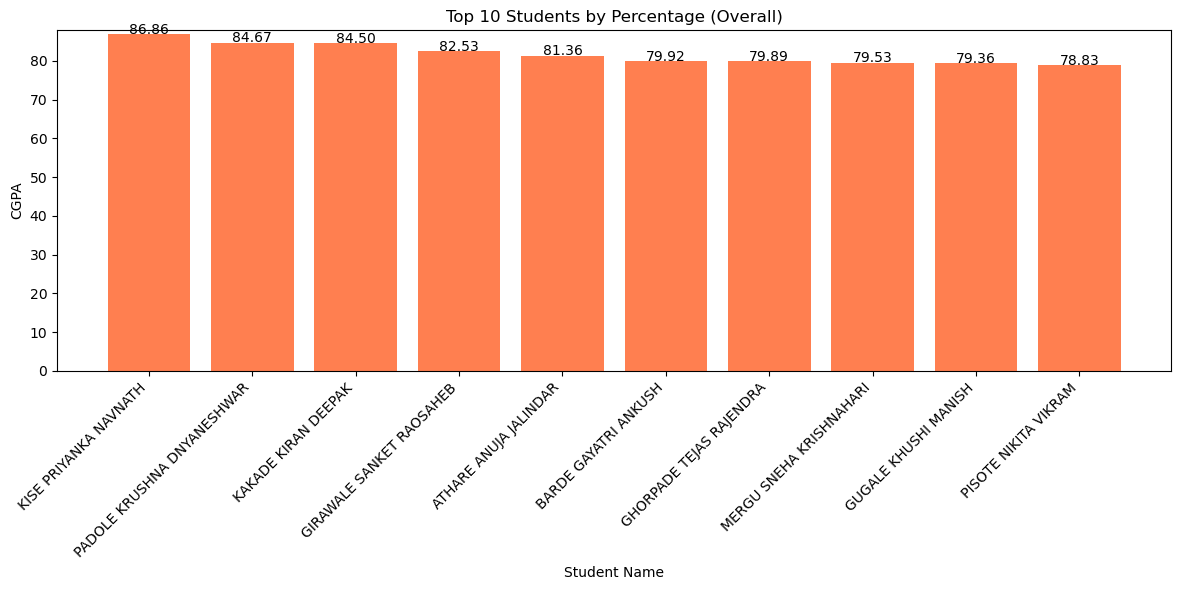

In [168]:
df['Name'] = df['Name'].str.strip()
unique_students = df[['Name', 'Percentage']].drop_duplicates()
top_10_students = unique_students.sort_values(by='Percentage', ascending=False).head(10)

print("Top 10 students by Percentage:")
print(top_10_students)

plt.figure(figsize=(12,6))
bars = plt.bar(top_10_students['Name'], top_10_students['Percentage'], color='coral')
plt.title('Top 10 Students by Percentage (Overall)')
plt.xlabel('Student Name')
plt.ylabel('CGPA')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}', ha='center')

plt.ylim(0, top_10_students['Percentage'].max() + 1)
plt.tight_layout()
plt.show()

In [169]:
df.columns

Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')

C:\Users\ACER\AppData\Local\Temp\ipykernel_3636\82039474.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='viridis')


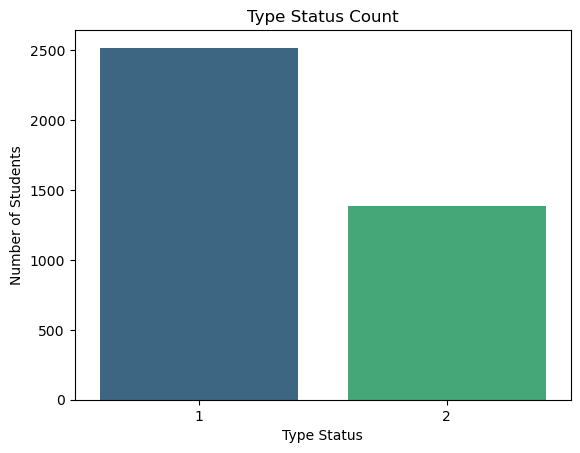

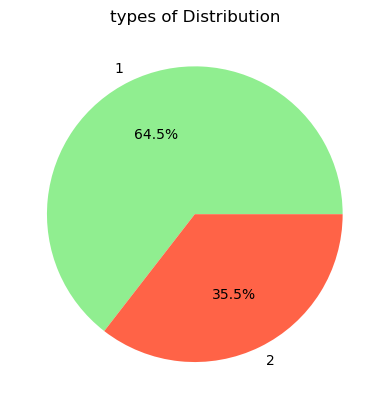

In [170]:
sns.countplot(x='Type', data=df, palette='viridis')

plt.xlabel('Type Status')
plt.ylabel('Number of Students')
plt.title('Type Status Count')
plt.show()
types = df['Type'].value_counts()

types.plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen', 'tomato'])
plt.title('types of Distribution')
plt.ylabel('')  
plt.show()

  Overall Category  Name
1      First Class    40
0      Distinction    20
2     Second Class     3


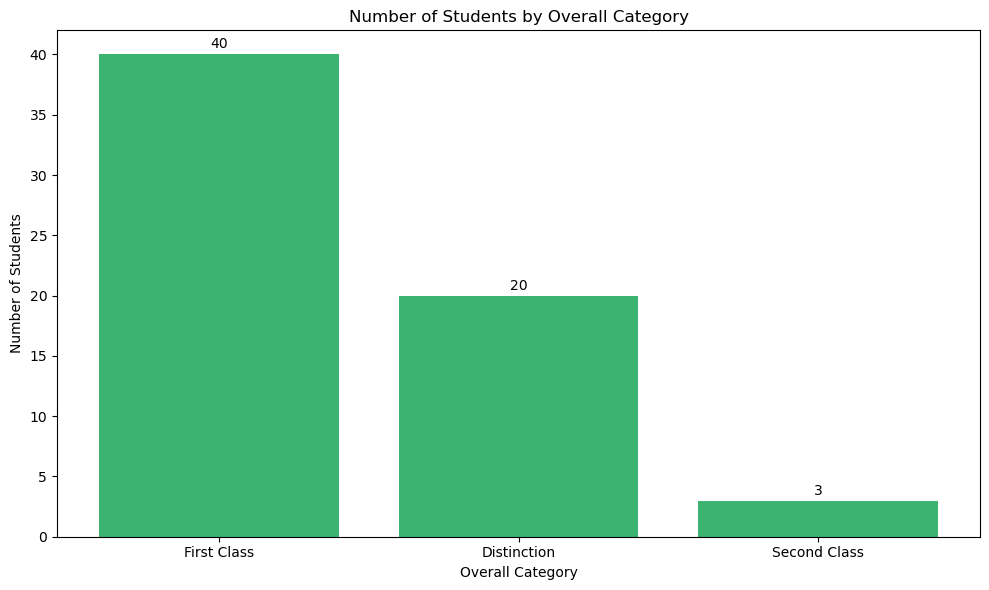

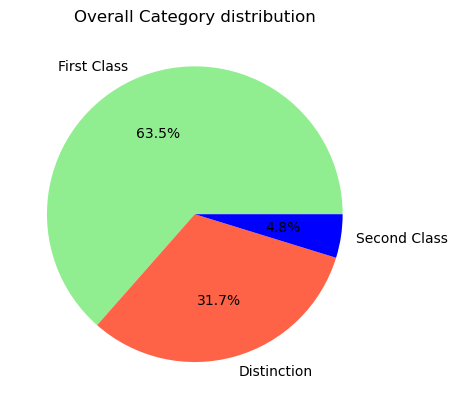

In [171]:
df['Name'] = df['Name'].str.strip()

category_counts = df.groupby('Overall Category')['Name'].nunique().reset_index()
category_counts = category_counts.sort_values(by='Name', ascending=False)
print(category_counts)

plt.figure(figsize=(10,6))
bars = plt.bar(category_counts['Overall Category'], category_counts['Name'], color='mediumseagreen')
plt.title('Number of Students by Overall Category')
plt.xlabel('Overall Category')
plt.ylabel('Number of Students')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, int(height), ha='center')
plt.tight_layout()
plt.show()
Category = df['Overall Category'].value_counts()
Category.plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen', 'tomato','blue'])

plt.title('Overall Category distribution')
plt.ylabel('') 
plt.show()

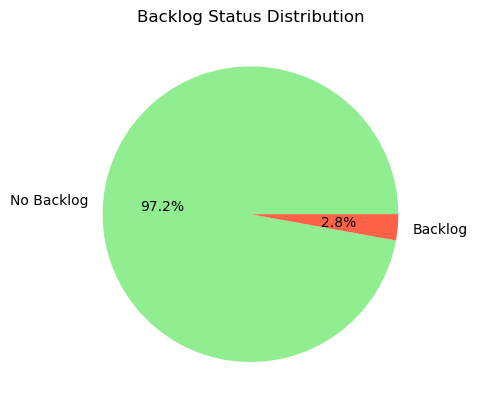

In [172]:
backlog_status = df['Backlog'].apply(lambda x: 'Backlog' if x > 0 else 'No Backlog').value_counts()

backlog_status.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'tomato'])
plt.title('Backlog Status Distribution')
plt.ylabel('')
plt.show()

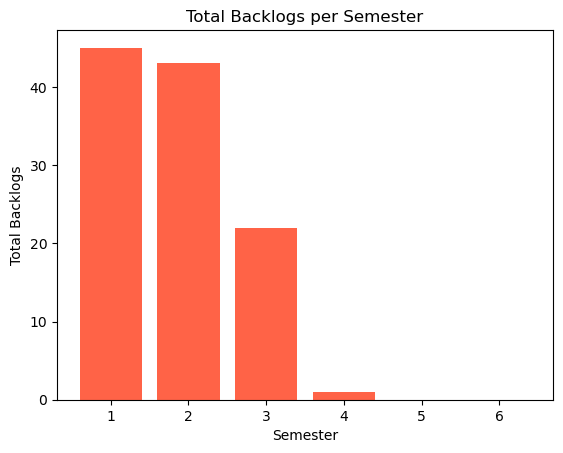

In [173]:
sem_backlog = df.groupby('Semester')['Backlog'].sum().reset_index()

plt.bar(sem_backlog['Semester'], sem_backlog['Backlog'], color='tomato')
plt.title('Total Backlogs per Semester')
plt.xlabel('Semester')
plt.ylabel('Total Backlogs')
plt.show()


In [174]:
print(df.columns)


Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')


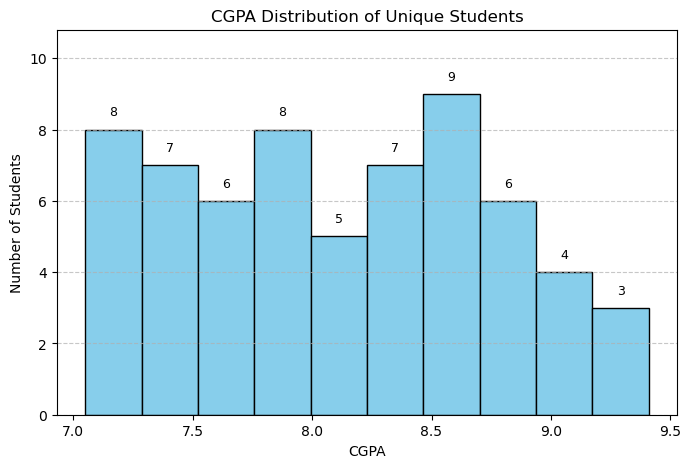

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df already loaded

unique_students = df.drop_duplicates(subset='Seat No')
cgpa_values = unique_students['CGPA'].dropna()  # 👈 fix: added ()

plt.figure(figsize=(8,5))

counts, bins, patches = plt.hist(cgpa_values, bins=10, color='skyblue', edgecolor='black')

for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right)/2, count + 0.3, str(int(count)),
             ha='center', va='bottom', fontsize=9)

plt.title('CGPA Distribution of Unique Students')
plt.xlabel('CGPA')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(counts)*1.2)  # adjust y-axis limit for label space
plt.show()


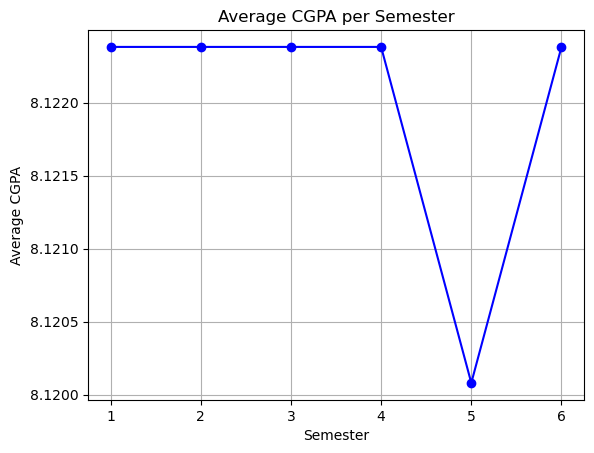

In [176]:
sem_avg = df.groupby('Semester')['CGPA'].mean().reset_index()

plt.plot(sem_avg['Semester'], sem_avg['CGPA'], marker='o', color='blue')
plt.title('Average CGPA per Semester')
plt.xlabel('Semester')
plt.ylabel('Average CGPA')
plt.grid(True)
plt.show()

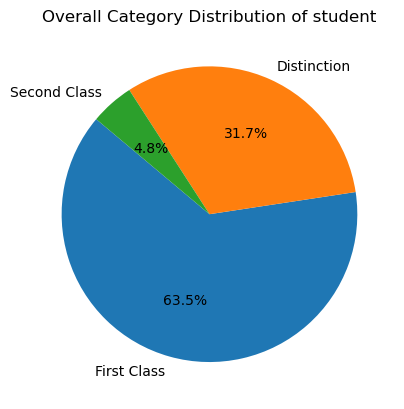

In [177]:
df['Overall Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Overall Category Distribution of student')
plt.ylabel('')
plt.show()

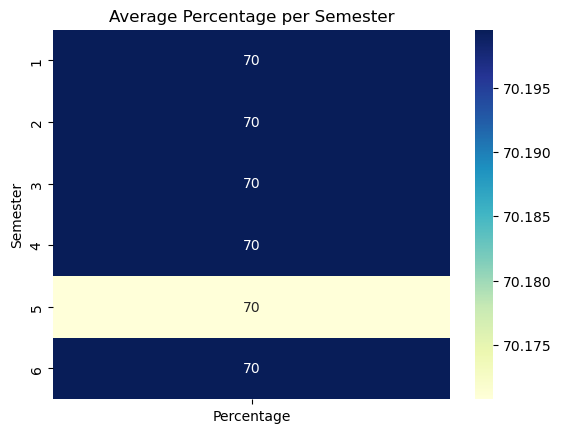

In [178]:
sem_percent = df.groupby(['Semester'])['Percentage'].mean().reset_index()
sem_percent_pivot = sem_percent.pivot_table(index='Semester', values='Percentage')

sns.heatmap(sem_percent_pivot, annot=True, cmap='YlGnBu')
plt.title('Average Percentage per Semester')
plt.show()

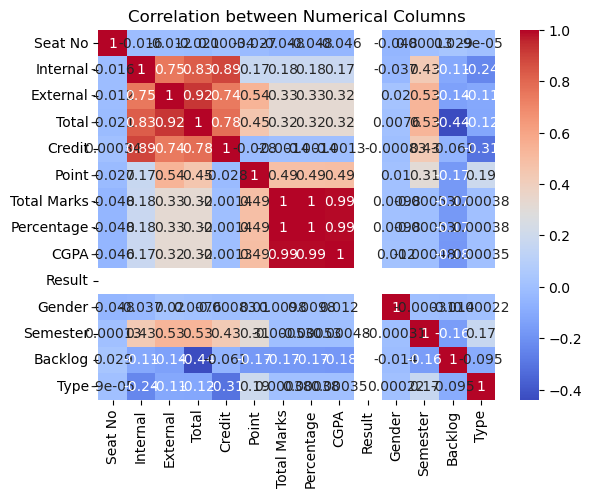

In [179]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Columns')
plt.show()

In [180]:
df.columns

Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')

In [181]:
df.head()

Seat No                    Name Mother's Name      PRN No  \
0  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
1  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
2  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
3  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
4  2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   

                         SUBJECT NAME        CODE  Internal  External  Total  \
0              BASIC PROGRAMMING IN C  BSC-DS101T        12        26     38   
1          DATABASE MANAGEMENT SYSTEM  BSC-DS102T        12        24     36   
2  ELEMENTS OF INFORMATION TECHNOLOGY  BSC-DS103T        12        19     31   
3       INTRODUCTION TO R PROGRAMMING  BSC-DS104T        10        20     30   
4                INTRODUCTION TO DATA  BSC-DS105T        11        26     37   

  Grade  ...  Point  Total Marks  Percentage  CGPA  Result  Gender  Semester  \
0    A+  ...      9       2831.0       78.64  8.77       1       0         1   
1     A  ...      8       2831.0       78.64  8.77       1       0         1   
2     A  ...      8       2831.0       78.64  8.77       1       0         1   
3     A  ...      8       2831.0       78.64  8.77       1       0         1   
4    A+  ...      9       2831.0       78.64  8.77       1       0         1   

   Backlog  Type  Overall Category  
0        0     1       Distinction  
1        0     1       Distinction  
2        0     1       Distinction  
3        0     1       Distinction  
4        0     1       Distinction  

[5 rows x 21 columns]

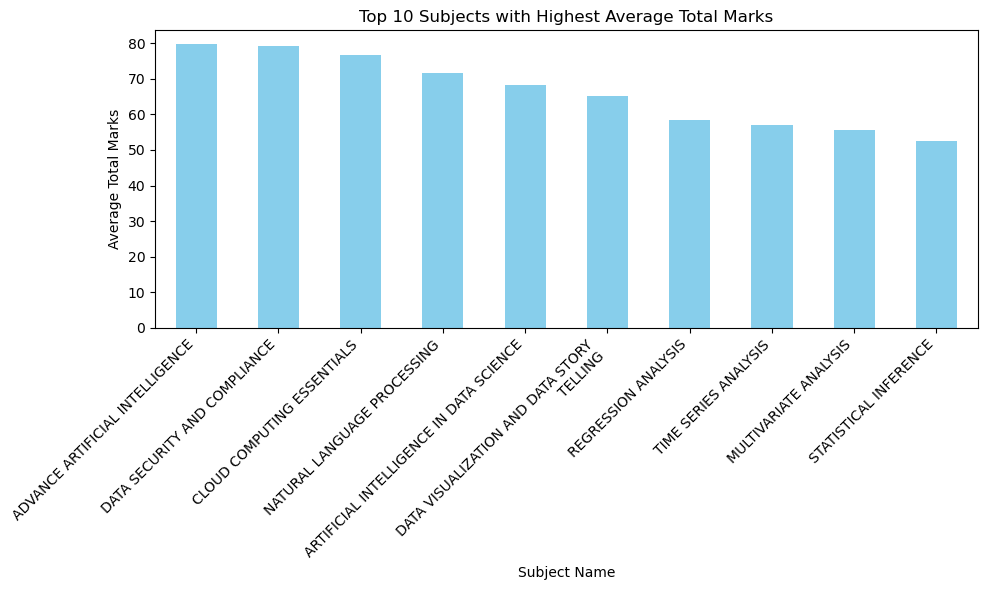

In [182]:
subject_avg_total = df.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
subject_avg_total.plot(kind='bar', color='skyblue')
plt.title('Top 10 Subjects with Highest Average Total Marks')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

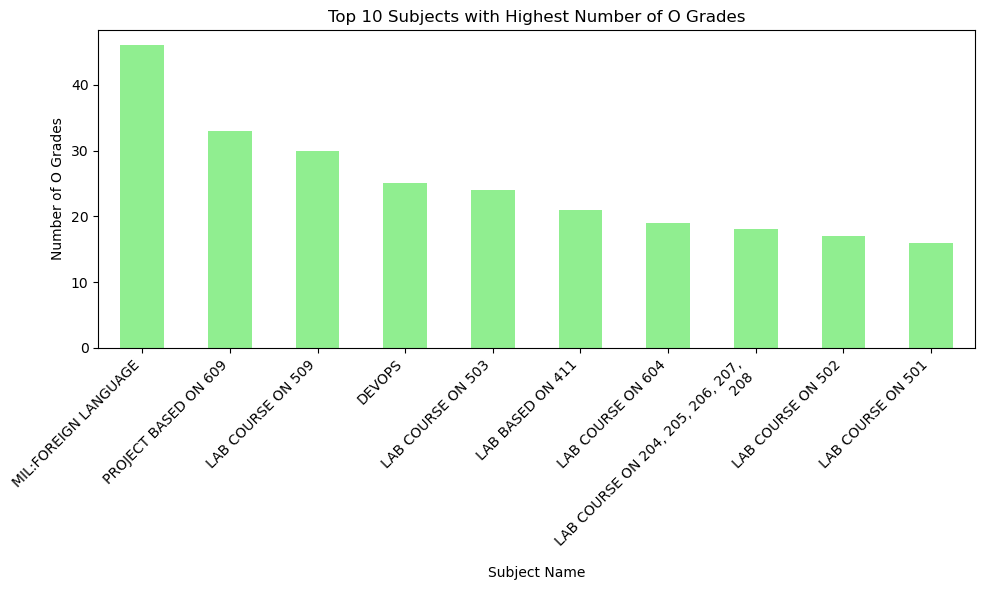

In [183]:
subject_grade_counts = df[df['Grade'] == 'O'].groupby('SUBJECT NAME').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
subject_grade_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Subjects with Highest Number of O Grades')
plt.xlabel('Subject Name')
plt.ylabel('Number of O Grades')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

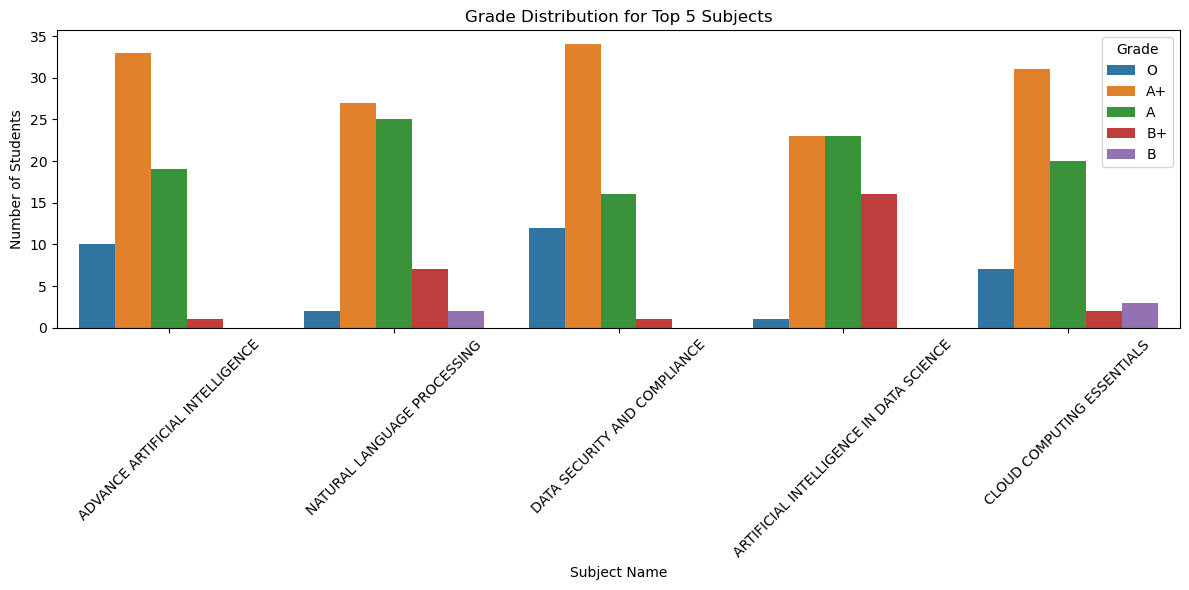

In [184]:
top_subjects = df.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(5).index
filtered_df = df[df['SUBJECT NAME'].isin(top_subjects)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, x='SUBJECT NAME', hue='Grade')
plt.title('Grade Distribution for Top 5 Subjects')
plt.xlabel('Subject Name')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.tight_layout()
plt.show()

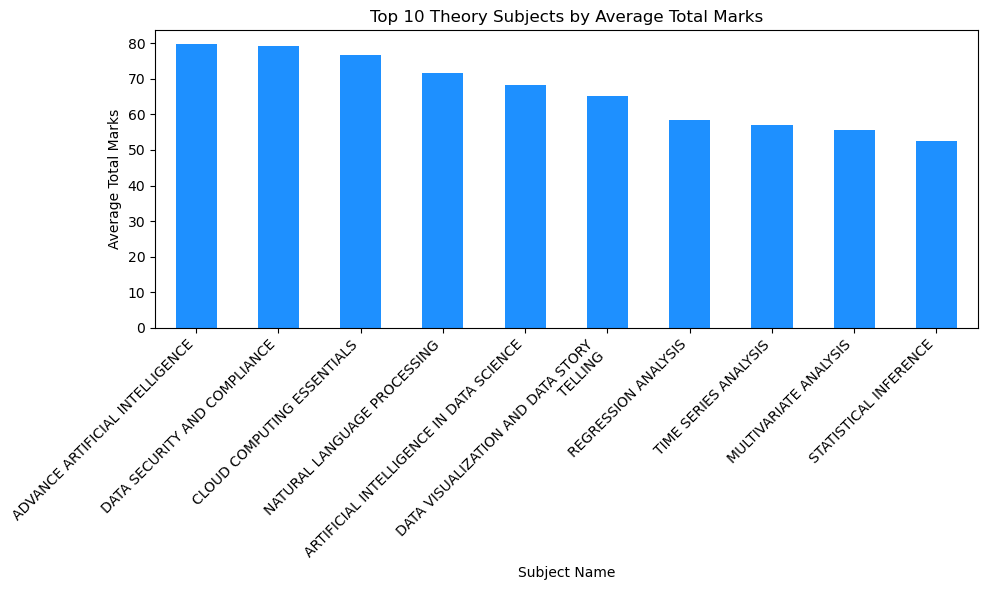

In [185]:
theory_df = df[df['Type'] == 1]
theory_avg_total = theory_df.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
theory_avg_total.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Theory Subjects by Average Total Marks')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

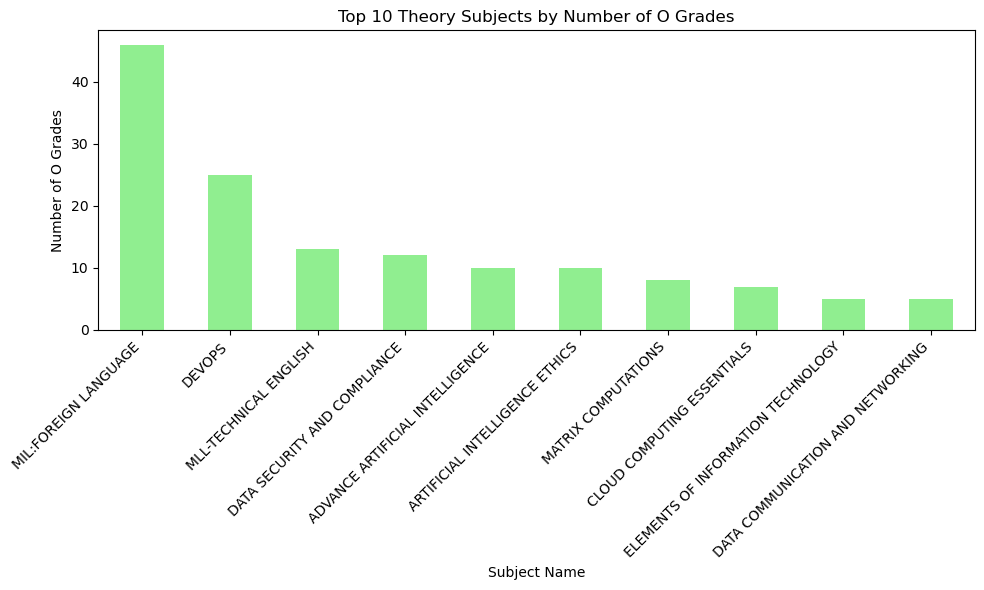

In [186]:
theory_o_grades = theory_df[theory_df['Grade'] == 'O'].groupby('SUBJECT NAME').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
theory_o_grades.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Theory Subjects by Number of O Grades')
plt.xlabel('Subject Name')
plt.ylabel('Number of O Grades')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

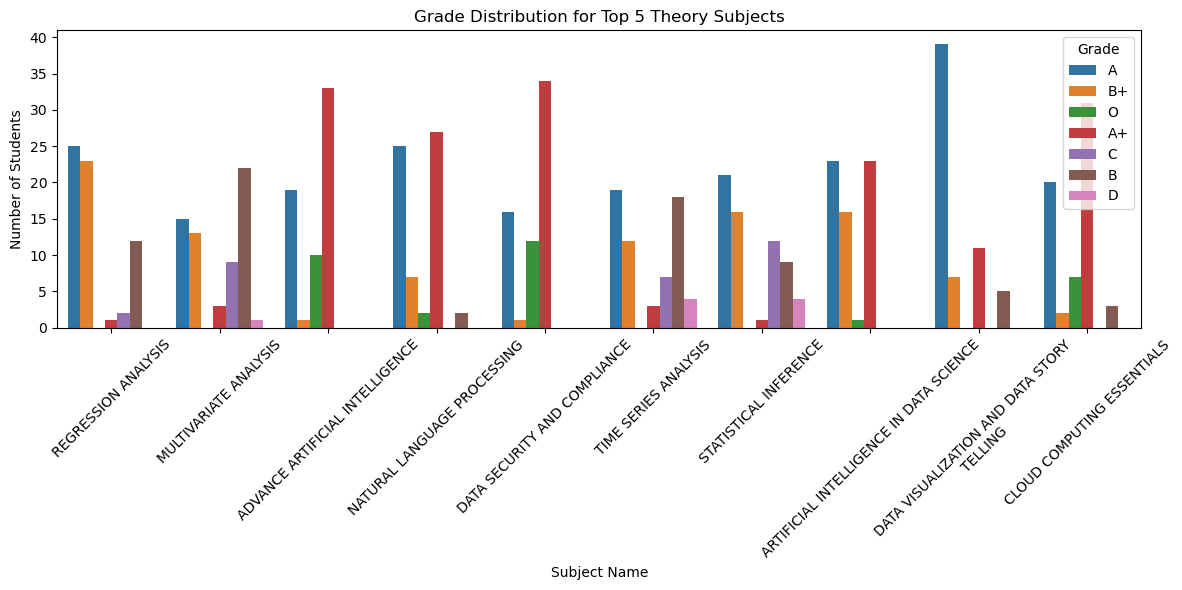

In [187]:
top_theory_subjects = theory_df.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(10).index
filtered_theory_df = theory_df[theory_df['SUBJECT NAME'].isin(top_theory_subjects)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_theory_df, x='SUBJECT NAME', hue='Grade')
plt.title('Grade Distribution for Top 5 Theory Subjects')
plt.xlabel('Subject Name')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.tight_layout()
plt.show()

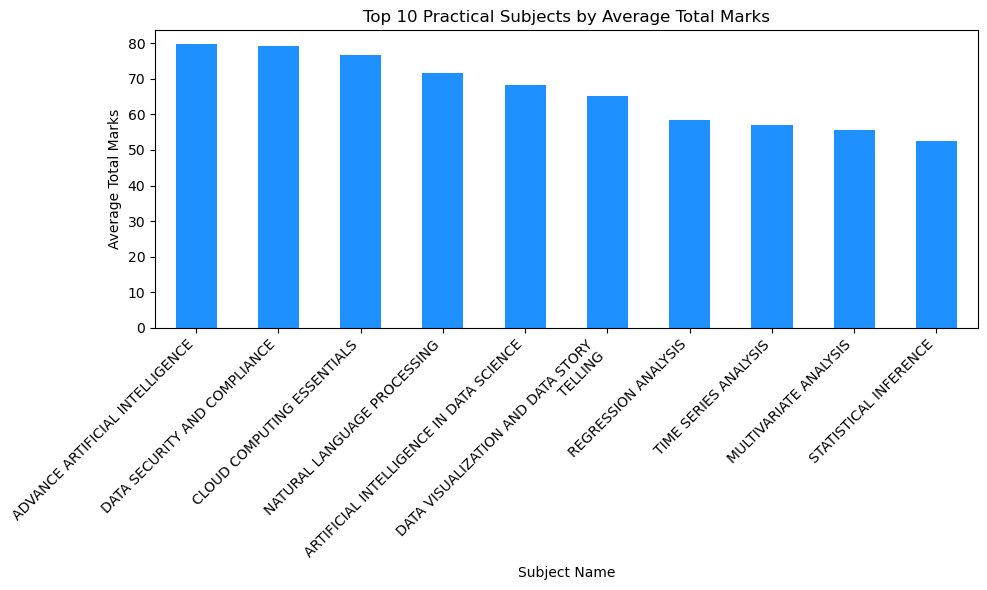

In [188]:
practical = df[df['Type'] == 2]
theory_avg_total = theory_df.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
theory_avg_total.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Practical Subjects by Average Total Marks')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

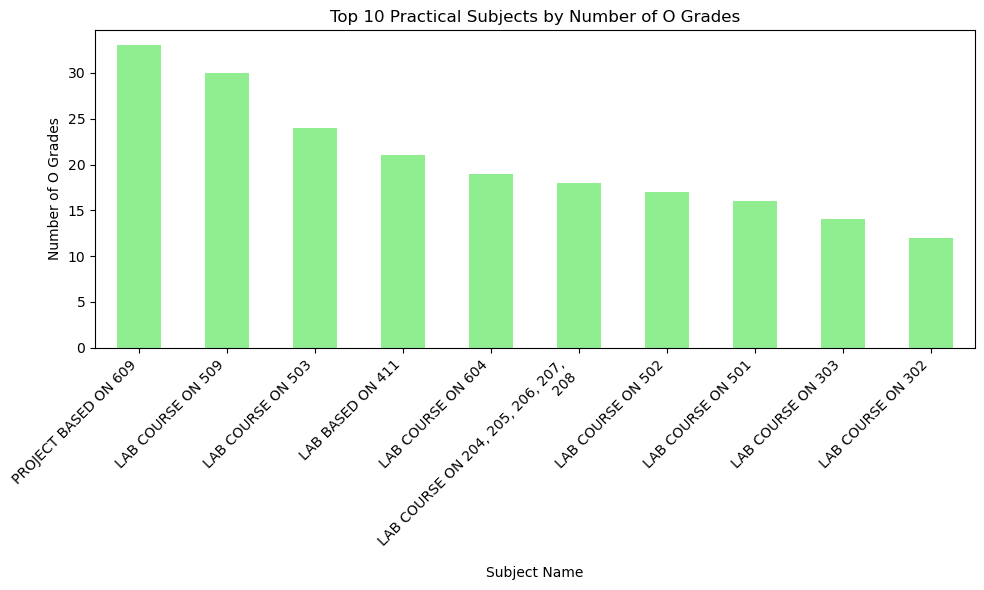

In [189]:
pract_o_grades = practical[practical['Grade'] == 'O'].groupby('SUBJECT NAME').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
pract_o_grades.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Practical Subjects by Number of O Grades')
plt.xlabel('Subject Name')
plt.ylabel('Number of O Grades')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

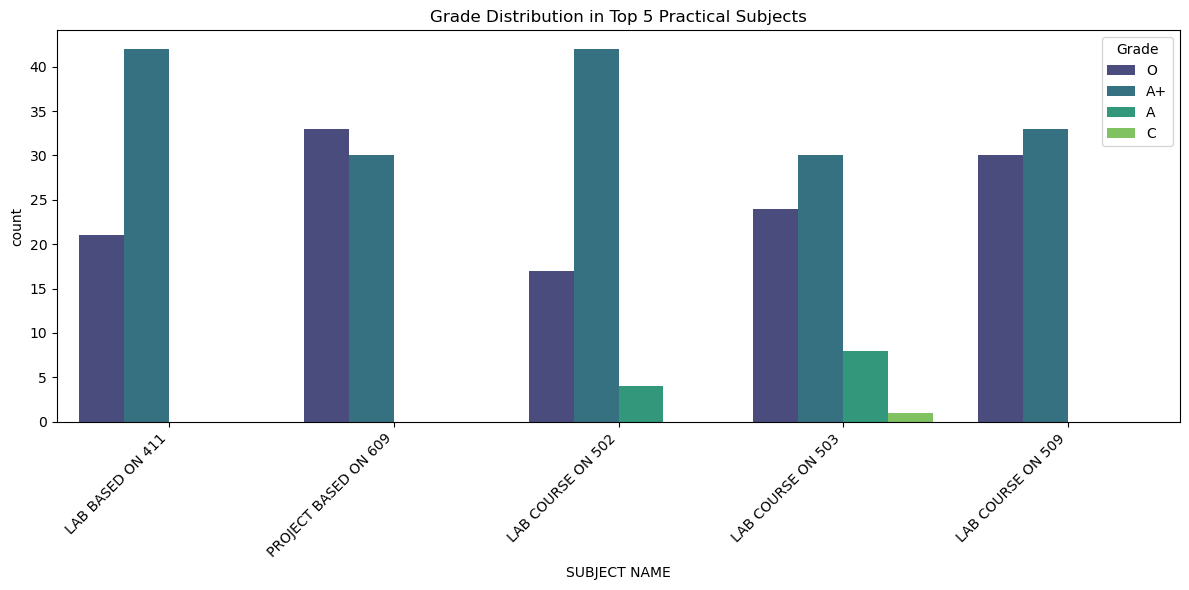

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Top 5 practical subjects by average total marks
top_practical_subjects = practical.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(5).index

# 📌 Filter practical data for those top subjects
filtered_practical_df = practical[practical['SUBJECT NAME'].isin(top_practical_subjects)]

# 📊 Countplot of Grades for those top subjects
plt.figure(figsize=(12,6))
sns.countplot(data=filtered_practical_df, x='SUBJECT NAME', hue='Grade', palette='viridis')
plt.title('Grade Distribution in Top 5 Practical Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


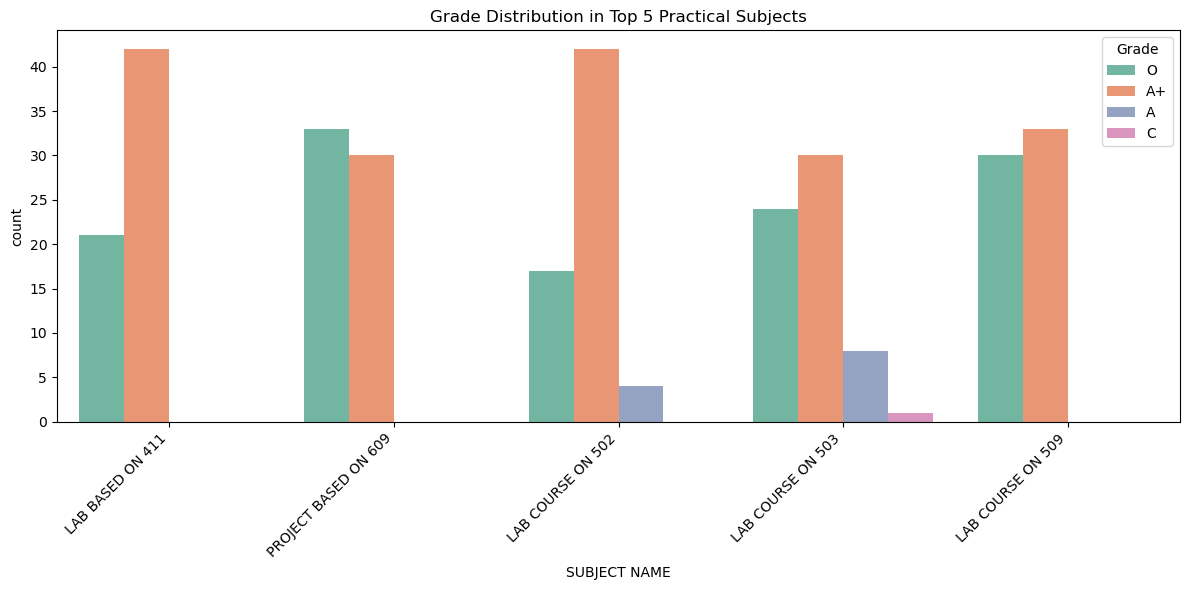

In [191]:
top_practical_subjects = practical.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(5).index
filtered_practical_df = practical[practical['SUBJECT NAME'].isin(top_practical_subjects)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_practical_df, x='SUBJECT NAME', hue='Grade', palette='Set2')
plt.title('Grade Distribution in Top 5 Practical Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

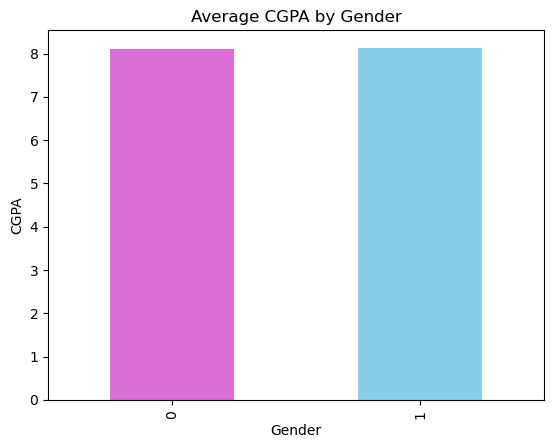

In [192]:
gender_avg_cgpa = df.groupby('Gender')['CGPA'].mean()

gender_avg_cgpa.plot(kind='bar', color=['orchid', 'skyblue'])
plt.title('Average CGPA by Gender')
plt.ylabel('CGPA')
plt.show()

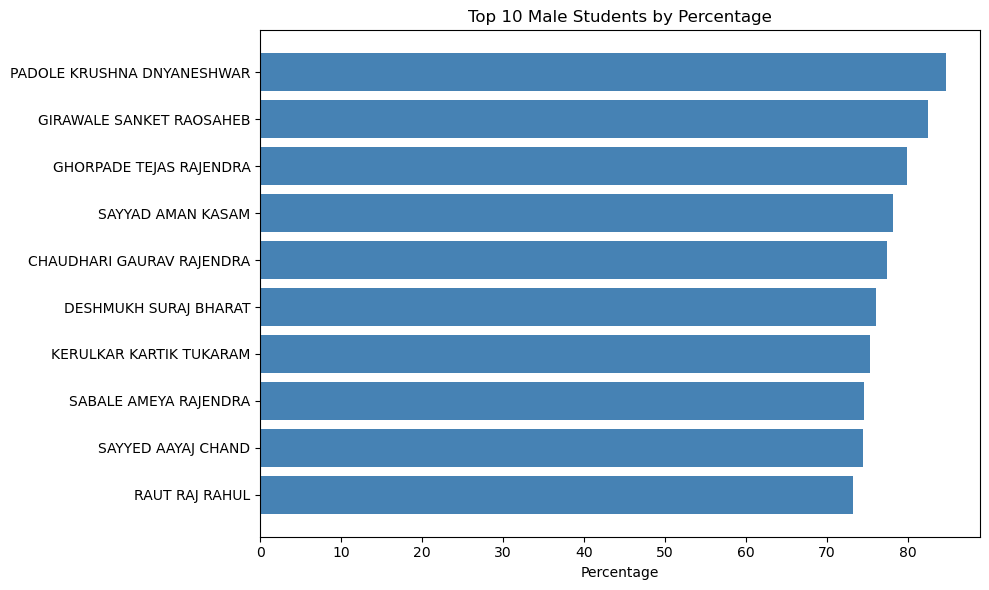

In [193]:
import matplotlib.pyplot as plt

# Filter male students
male_students = df[df['Gender'] == 1]

# Sort by Percentage and pick top 10
top_male_students = male_students[['Name', 'Percentage']].drop_duplicates().sort_values(by='Percentage', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.barh(top_male_students['Name'], top_male_students['Percentage'], color='steelblue')
plt.xlabel('Percentage')
plt.title('Top 10 Male Students by Percentage')
plt.gca().invert_yaxis()  # To display highest percentage at top
plt.tight_layout()
plt.show()


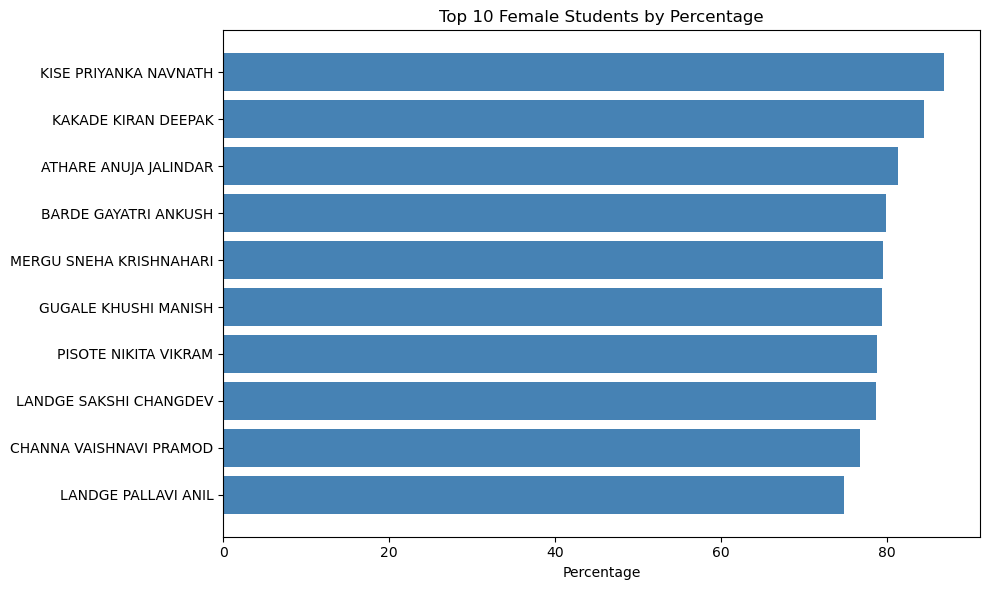

In [194]:
female_students = df[df['Gender'] == 0]
top_female_students = female_students[['Name', 'Percentage']].drop_duplicates().sort_values(by='Percentage', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_female_students['Name'], top_female_students['Percentage'], color='steelblue')
plt.xlabel('Percentage')
plt.title('Top 10 Female Students by Percentage')
plt.gca().invert_yaxis()  # To display highest percentage at top
plt.tight_layout()
plt.show()

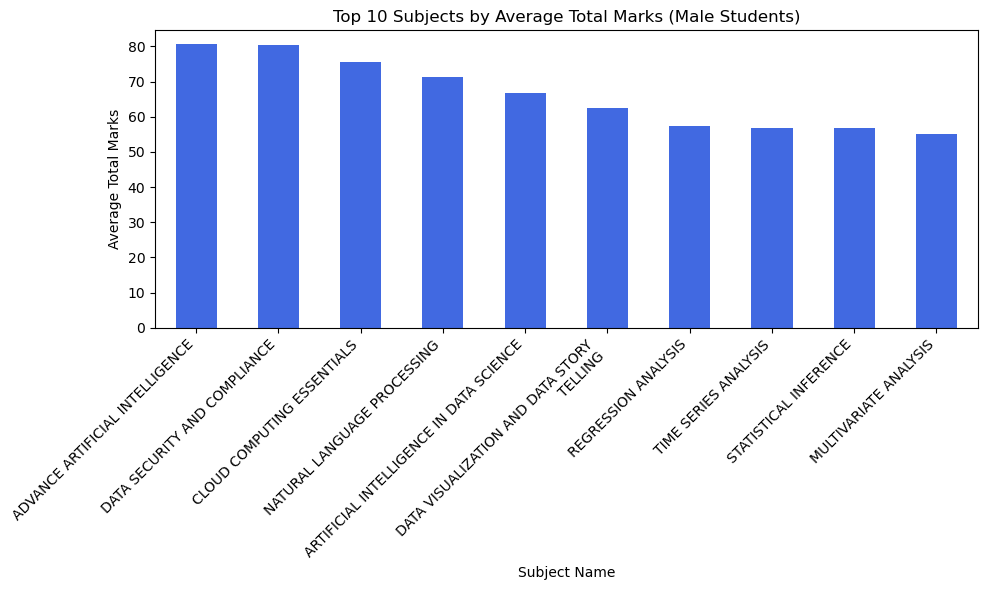

In [195]:
male_students = df[df['Gender'] == 1]
male_subject_avg = male_students.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
male_subject_avg.plot(kind='bar', color='royalblue')
plt.title('Top 10 Subjects by Average Total Marks (Male Students)')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

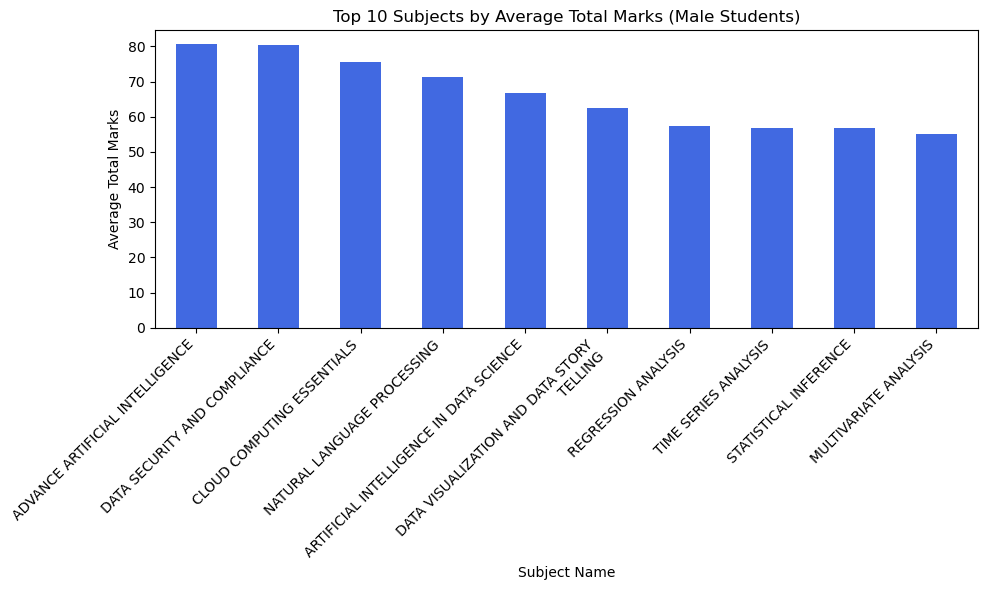

In [196]:
male_students = df[df['Gender'] == 1]
male_subject_avg = male_students.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
male_subject_avg.plot(kind='bar', color='royalblue')
plt.title('Top 10 Subjects by Average Total Marks (Male Students)')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [197]:
top_male_per_subject = male_students.loc[male_students.groupby('SUBJECT NAME')['Total'].idxmax()][['SUBJECT NAME', 'Name', 'Total']]

top_male_per_subject = top_male_per_subject.sort_values(by='Total', ascending=False)
print(top_male_per_subject.head(10))

                                    SUBJECT NAME                        Name  \
366              ADVANCE ARTIFICIAL INTELLIGENCE  PADOLE KRUSHNA DNYANESHWAR   
2744                DATA SECURITY AND COMPLIANCE       SABALE AMEYA RAJENDRA   
3094                  CLOUD COMPUTING ESSENTIALS     GHORPADE TEJAS RAJENDRA   
367                  NATURAL LANGUAGE PROCESSING  PADOLE KRUSHNA DNYANESHWAR   
3092     ARTIFICIAL INTELLIGENCE IN DATA SCIENCE     GHORPADE TEJAS RAJENDRA   
442                         TIME SERIES ANALYSIS    GIRAWALE SANKET RAOSAHEB   
2961  DATA VISUALIZATION AND DATA STORY\nTELLING           SAYYAD AMAN KASAM   
444                        STATISTICAL INFERENCE    GIRAWALE SANKET RAOSAHEB   
357                          REGRESSION ANALYSIS  PADOLE KRUSHNA DNYANESHWAR   
4120                       MULTIVARIATE ANALYSIS     KERULKAR KARTIK TUKARAM   

      Total  
366      97  
2744     97  
3094     94  
367      91  
3092     87  
442      86  
2961     77  
444    

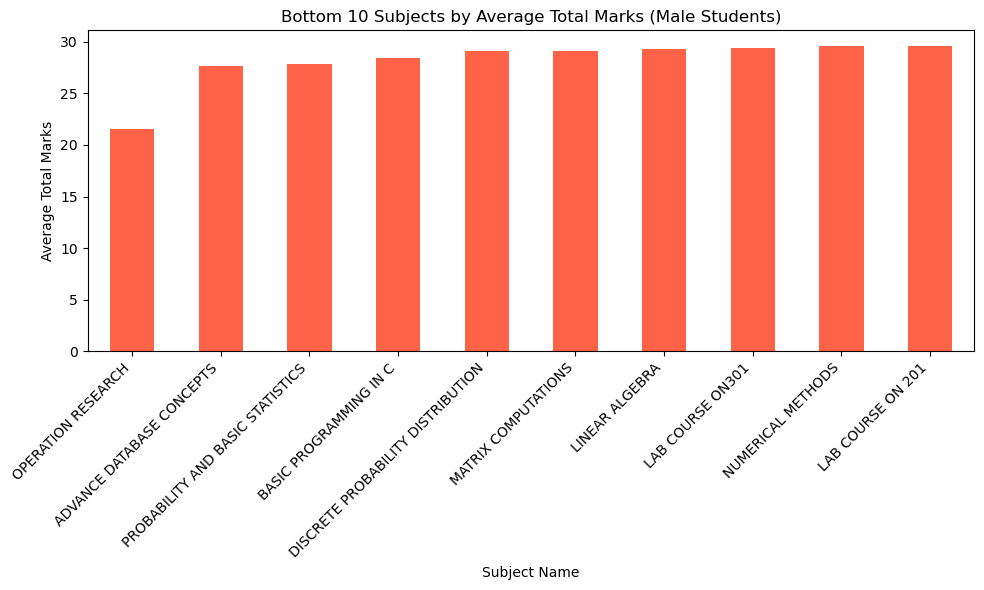

In [198]:
male_students = df[df['Gender'] == 1]
bottom_subject_avg = male_students.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
bottom_subject_avg.plot(kind='bar', color='tomato')
plt.title('Bottom 10 Subjects by Average Total Marks (Male Students)')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

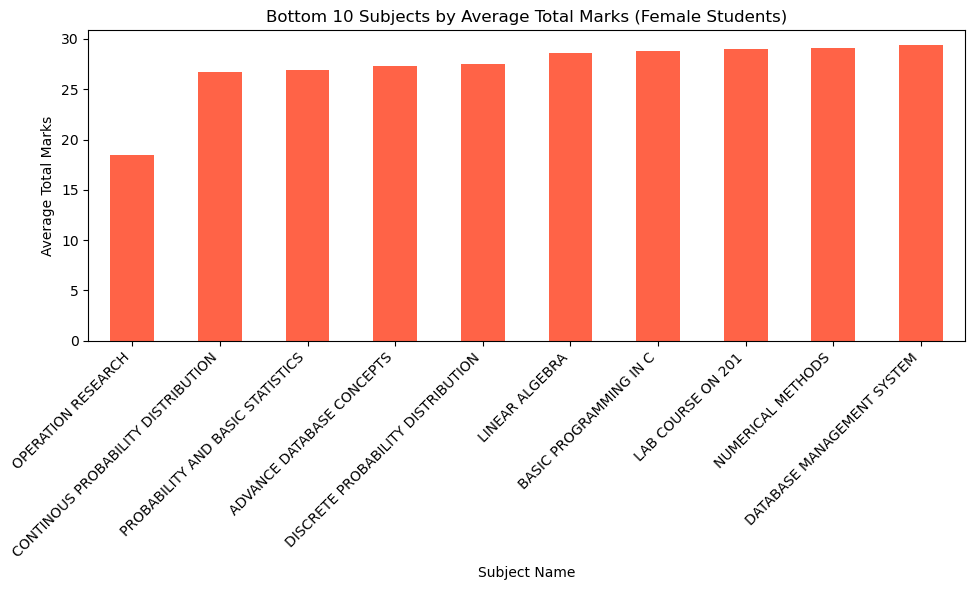

In [199]:
male_students = df[df['Gender'] == 0]
bottom_subject_avg = male_students.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
bottom_subject_avg.plot(kind='bar', color='tomato')
plt.title('Bottom 10 Subjects by Average Total Marks (Female Students)')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [200]:
df.columns

Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')


Bottom 10 Subjects by Average Total Marks:

                          SUBJECT NAME      Total
55                  OPERATION RESEARCH  19.793651
56    PROBABILITY AND BASIC STATISTICS  27.317460
1            ADVANCE DATABASE CONCEPTS  27.444444
16   DISCRETE PROBABILITY DISTRIBUTION  28.174603
7   CONTINOUS PROBABILITY DISTRIBUTION  28.476190
5               BASIC PROGRAMMING IN C  28.634921
45                      LINEAR ALGEBRA  28.936508
28                   LAB COURSE ON 201  29.253968
53                   NUMERICAL METHODS  29.317460
13          DATABASE MANAGEMENT SYSTEM  29.507937

Lowest Scoring Student per Bottom 10 Subject:

                            SUBJECT NAME                     Name  Total
1069           ADVANCE DATABASE CONCEPTS   CHEMATE ARTI BALASAHEB      0
792               BASIC PROGRAMMING IN C  WAYKAR SAINATH SUDHAKAR      0
3316  CONTINOUS PROBABILITY DISTRIBUTION      GORE KOMAL JALINDAR      0
199           DATABASE MANAGEMENT SYSTEM    DANGAT AMBIKA HARIDAS

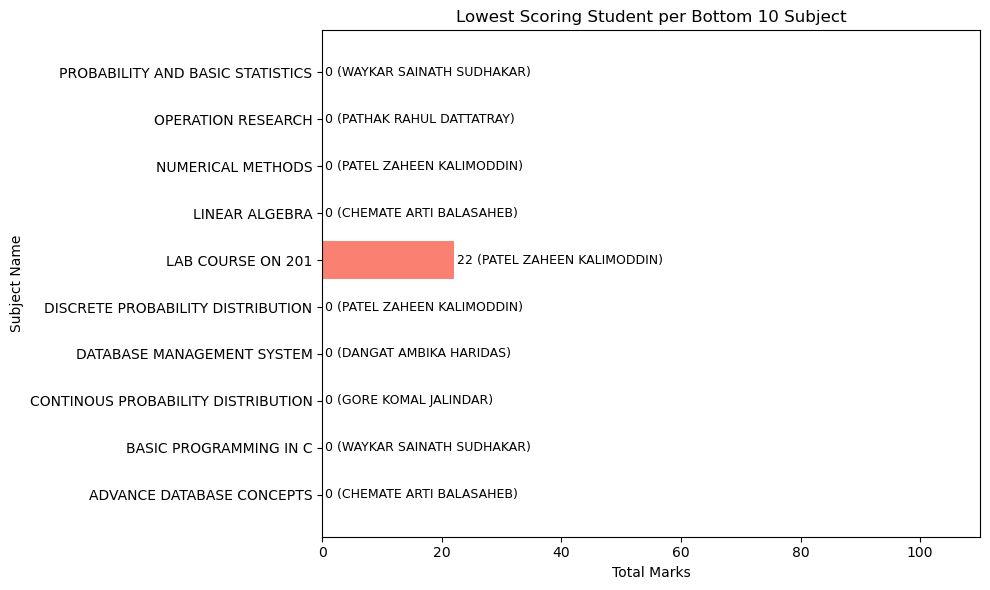

In [201]:
avg_marks_per_subject = df.groupby('SUBJECT NAME')['Total'].mean().reset_index()
bottom_10_subjects = avg_marks_per_subject.sort_values(by='Total', ascending=True).head(10)
print("\nBottom 10 Subjects by Average Total Marks:\n")
print(bottom_10_subjects)

lowest_student_per_subject = df.loc[
    df[df['SUBJECT NAME'].isin(bottom_10_subjects['SUBJECT NAME'])]  # filter for those subjects
    .groupby('SUBJECT NAME')['Total'].idxmin()  # get index of min marks per subject
][['SUBJECT NAME', 'Name', 'Total']]
print("\nLowest Scoring Student per Bottom 10 Subject:\n")
print(lowest_student_per_subject)

plt.figure(figsize=(10,6))
bars = plt.barh(lowest_student_per_subject['SUBJECT NAME'], lowest_student_per_subject['Total'], color='salmon')

for bar, student in zip(bars, lowest_student_per_subject['Name']):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.0f} ({student})', 
             ha='left', va='center', fontsize=9)

plt.title('Lowest Scoring Student per Bottom 10 Subject')
plt.xlabel('Total Marks')
plt.ylabel('Subject Name')
plt.xlim(0, 110)
plt.tight_layout()
plt.show()

In [202]:
grade_map = {'O':10, 'A+':9, 'A':8, 'B+':7, 'B':6, 'C':5, 'P':4, 'F':0}
df['Grade_Num'] = df['Grade'].map(grade_map)

In [203]:
df_valid = df.dropna(subset=['Grade_Num'])
bottom_10_students = df_valid.sort_values(by='Grade_Num').head(10)
print(bottom_10_students[['Name', 'SUBJECT NAME', 'Grade', 'Grade_Num']])

                          Name                        SUBJECT NAME Grade  \
995       BHAPKAR ROHAN VIKRAM    PROBABILITY AND BASIC STATISTICS     C   
3795  KAKADE VAISHNAVI NAVNATH             ENVIRONMENTAL AWARENESS     C   
907    PATEL ZAHEEN KALIMODDIN                    LAB COURSE ON301     C   
906    PATEL ZAHEEN KALIMODDIN               STATISTICAL INFERENCE     C   
3361       GORE KOMAL JALINDAR                   LAB COURSE ON 503     C   
2323  KARANDE YUVRAJ BHAUSAHEB           ADVANCE DATABASE CONCEPTS     C   
3978   DHAMANE PRANOTI SHANKAR                  OPERATION RESEARCH     C   
3977   DHAMANE PRANOTI SHANKAR                      LINEAR ALGEBRA     C   
148      MANIYAR TANJILA SALIM  CONTINOUS PROBABILITY DISTRIBUTION     C   
3976   DHAMANE PRANOTI SHANKAR  CONTINOUS PROBABILITY DISTRIBUTION     C   

      Grade_Num  
995         5.0  
3795        5.0  
907         5.0  
906         5.0  
3361        5.0  
2323        5.0  
3978        5.0  
3977        5.0  
1

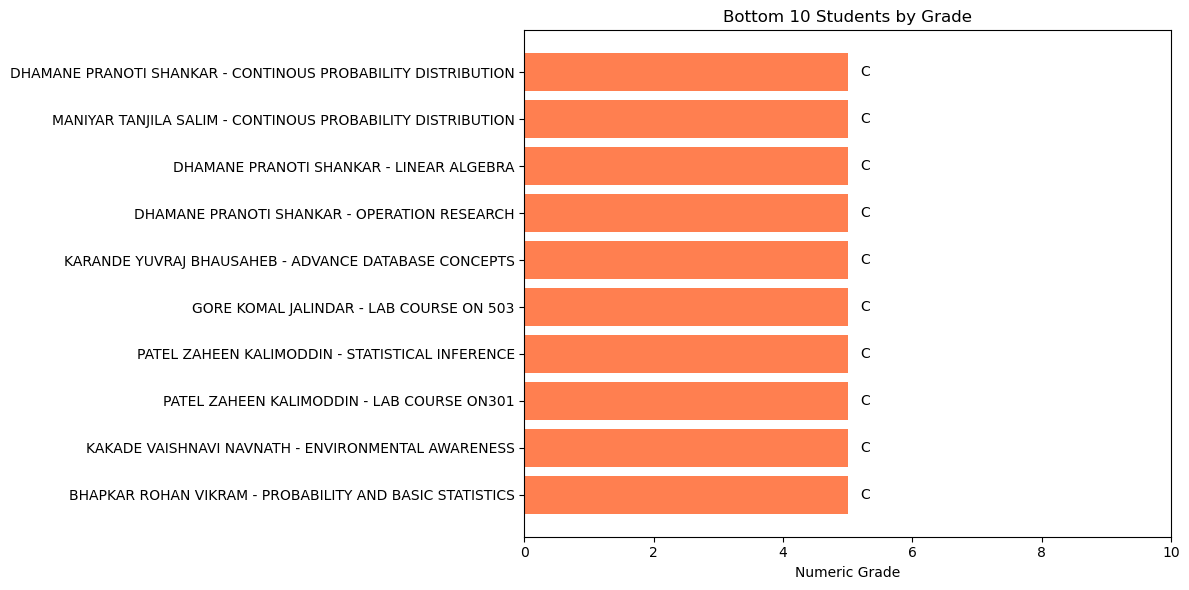

In [204]:
plt.figure(figsize=(12,6))
bars = plt.barh(bottom_10_students['Name'] + ' - ' + bottom_10_students['SUBJECT NAME'], 
                bottom_10_students['Grade_Num'], color='coral')

for bar, grade in zip(bars, bottom_10_students['Grade']):
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, grade, ha='left', va='center')

plt.xlabel('Numeric Grade')
plt.title('Bottom 10 Students by Grade')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

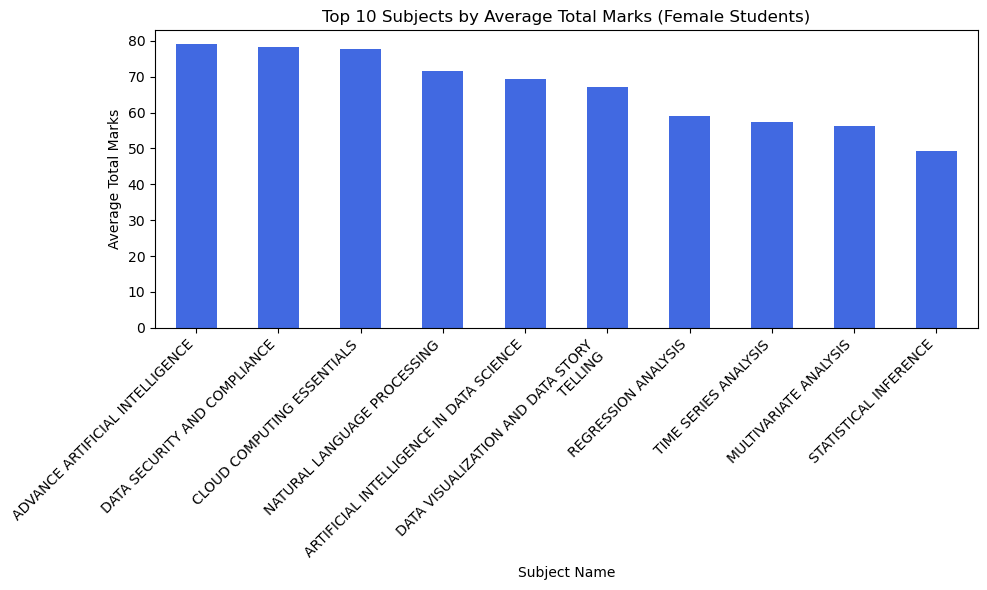

In [205]:
female_students = df[df['Gender'] == 0]
female_subject_avg = female_students.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
female_subject_avg.plot(kind='bar', color='royalblue')
plt.title('Top 10 Subjects by Average Total Marks (Female Students)')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

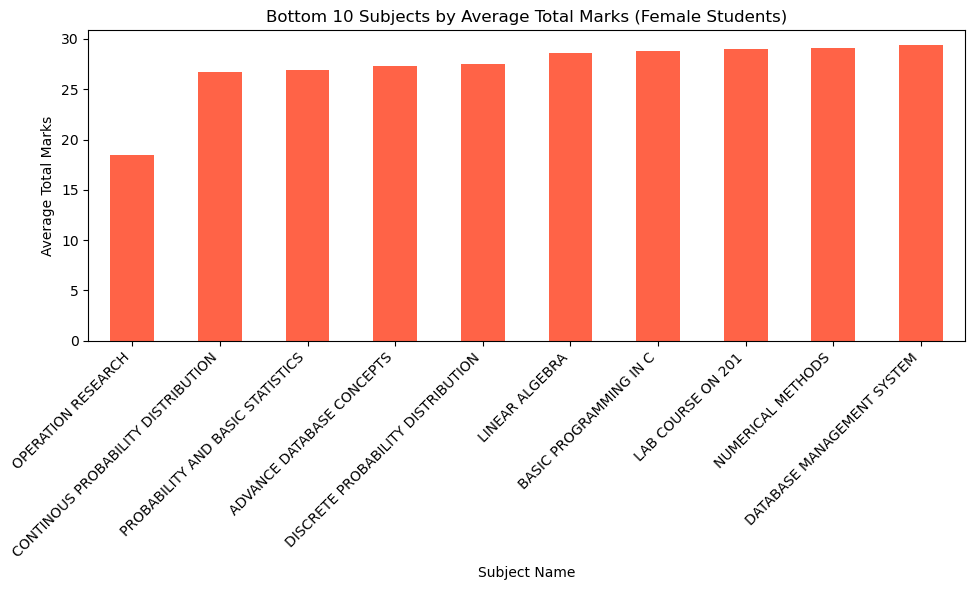

In [206]:
female_students = df[df['Gender'] == 0]
bottom_subject_avg = female_students.groupby('SUBJECT NAME')['Total'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
bottom_subject_avg.plot(kind='bar', color='tomato')
plt.title('Bottom 10 Subjects by Average Total Marks (Female Students)')
plt.xlabel('Subject Name')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Lets apply machine and Deep learning models to data sets 

# First apply classification

In [209]:
df=pd.read_excel("aa.xlsx")

In [210]:
df

Seat No                    Name Mother's Name      PRN No  \
0     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
1     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
2     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
3     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
4     2201036  LANDGE SAKSHI CHANGDEV       ARCHANA  SU00001852   
...       ...                     ...           ...         ...   
4285  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4286  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4287  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4288  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   
4289  2207074  DAWARE PRAJAKTA SANJAY         JOYTI  SU00001829   

                                           SUBJECT NAME         CODE CIE ESE  \
0                                BASIC PROGRAMMING IN C   BSC-DS101T  12  26   
1                            DATABASE MANAGEMENT SYSTEM   BSC-DS102T  12  24   
2                    ELEMENTS OF INFORMATION TECHNOLOGY   BSC-DS103T  12  19   
3                         INTRODUCTION TO R PROGRAMMING   BSC-DS104T  10  20   
4                                  INTRODUCTION TO DATA   BSC-DS105T  11  26   
...                                                 ...          ...  ..  ..   
4285                                  LAB COURSE ON 503  BSC-DS 507P  14  33   
4286                     ARTIFICIAL INTELLIGENCE ETHICS  BSC-DS 509T  10  34   
4287                                  LAB COURSE ON 509  BSC-DS 510P  14  32   
4288  COMPLETION OF SKILL-BASED CERTIFICATE\nCOURSE ...          NaN   -   -   
4289                                      SURVEY REPORT       ACUG-K   -   -   

     TOT  GR  ...    PT Total Marks  Percentage  CGPA  Result  Gender  \
0     38  A+  ...   9.0      2831.0       78.64  8.77    Pass  Female   
1     36   A  ...   8.0      2831.0       78.64  8.77    Pass  Female   
2     31   A  ...   8.0      2831.0       78.64  8.77    Pass  Female   
3     30   A  ...   8.0      2831.0       78.64  8.77    Pass  Female   
4     37  A+  ...   9.0      2831.0       78.64  8.77    Pass  Female   
...   ..  ..  ...   ...         ...         ...   ...     ...     ...   
4285  47   O  ...  10.0      2693.0       74.81  8.51    Pass  Female   
4286  44  A+  ...   9.0      2693.0       74.81  8.51    Pass  Female   
4287  46   O  ...  10.0      2693.0       74.81  8.51    Pass  Female   
4288   -  SA  ...     -      2693.0       74.81  8.51    Pass  Female   
4289   -  SA  ...     -      2693.0       74.81  8.51    Pass  Female   

     Semester  Backlog       Type Overall Category  
0           1       No     Theory      Distinction  
1           1       No     Theory      Distinction  
2           1       No     Theory      Distinction  
3           1       No     Theory      Distinction  
4           1       No     Theory      Distinction  
...       ...      ...        ...              ...  
4285        5       No  Practical      Distinction  
4286        5       No     Theory      Distinction  
4287        5       No  Practical      Distinction  
4288        5       No      Other      Distinction  
4289        5       No      Other      Distinction  

[4290 rows x 21 columns]

In [211]:
df.rename(columns={
    'CIE': 'Internal',
    'ESE': 'External',
    'TOT': 'Total',
    'GR': 'Grade',
    'CR': 'Credit',
    'PT': 'Point'
}, inplace=True)


In [212]:
df = df.dropna(subset=['Grade'])

df = df[df['Grade'] != 'SA']
df['Grade'].unique()

array(['A+', 'A', 'B+', 'B', 'C', 'O', 'D', 'F'], dtype=object)

In [213]:
cols_to_convert = ['Internal', 'External', 'Total', 'Credit', 'Point']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

print("Cleaned Data shape:", df.shape)
df.sample(5)

Cleaned Data shape: (4030, 21)


Seat No                      Name Mother's Name      PRN No  \
3342  2203500       GORE KOMAL JALINDAR          MAYA  SU00001838   
3347  2203500       GORE KOMAL JALINDAR          MAYA  SU00001838   
2781  2203492     KISE PRIYANKA NAVNATH    SHAKUNTALA  SU00001850   
1555  2203167      SHINDE GAYATRI ASHOK         VIDYA  SU00001875   
2316  2203485  KARANDE YUVRAJ BHAUSAHEB        MANGAL  SU00001847   

                     SUBJECT NAME         CODE  Internal  External  Total  \
3342                       DEVOPS  BSC-DS 609T        12        32     44   
3347                        NOSQL   BSC-DS303T         9        30     39   
2781            LAB COURSE ON 102   BSC-DS110P        14        34     48   
1555  NATURAL LANGUAGE PROCESSING  BSC-DS 603T        21        36     57   
2316          MATRIX COMPUTATIONS   BSC-DS107T        10        14     24   

     Grade  ...  Point  Total Marks  Percentage  CGPA  Result  Gender  \
3342    A+  ...      9       2271.0       63.08  7.52    Pass  Female   
3347    A+  ...      9       2271.0       63.08  7.52    Pass  Female   
2781     O  ...     10       3127.0       86.86  9.41    Pass  Female   
1555    B+  ...      7          NaN       56.47  6.75    Pass  Female   
2316     C  ...      5       2148.0       59.67  7.05    Pass    Male   

     Semester  Backlog       Type Overall Category  
3342        6       No     Theory      First Class  
3347        3       No     Theory      First Class  
2781        1       No  Practical      Distinction  
1555        6       No     Theory     Second Class  
2316        1       No     Theory     Second Class  

[5 rows x 21 columns]

In [214]:
df.isna().sum()

Seat No              0
Name                 0
Mother's Name        0
PRN No               0
SUBJECT NAME         0
CODE                 1
Internal             0
External             0
Total                0
Grade                0
Credit               0
Point                0
Total Marks         62
Percentage           0
CGPA                62
Result              62
Gender               0
Semester             0
Backlog              0
Type                 0
Overall Category     0
dtype: int64

In [215]:
df.dropna(inplace=True)

In [216]:
df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize().map({'Female': 0, 'Male': 1})

df['Result'] = df['Result'].astype(str).str.strip().str.capitalize().map({'Pass': 1, 'Fail': 0})

df['Backlog'] = df['Backlog'].astype(str).str.strip().str.capitalize().map({'No': 0, 'Yes': 1})

df['Type'] = df['Type'].astype(str).str.strip().str.capitalize().map({'Theory': 1, 'Practical': 2,'Other':0})

# convert data into numbers

In [217]:
df.sample(10)

Seat No                      Name  \
3334  2203500       GORE KOMAL JALINDAR   
1975  2203479    GAIKWAD KOMAL CHANGDEV   
4083  2203511   WALUNJKAR SANIKA GANESH   
3626  2203504  JADHAV SAMRUDDHI SANTOSH   
1879  2203478       SHELAR RASIKA RAHUL   
942   2203084        SAYYED AAYAJ CHAND   
4230  2207074    DAWARE PRAJAKTA SANJAY   
1388  2203093   CHAVAN SHAILESH BHIMRAO   
4150  2205321   KERULKAR KARTIK TUKARAM   
327   2203073      KADAM SHRADDHA KIRAN   

                                          Mother's Name      PRN No  \
3334                                               MAYA  SU00001838   
1975                                               ALKA  SU00001833   
4083                                            DEVYANI  SU00001881   
3626                                             SAVITA  SU00001842   
1879  CODE SUBJECT NAME CIE ESE TOT GR CR PT CODE SU...  SU00001873   
942                                             RESHAMA  SU00001872   
4230                                              JOYTI  SU00001829   
1388                                            SUVARNA  SU00001826   
4150                                               BABY  SU00001849   
327                                              PUSHPA  SU00001843   

                                    SUBJECT NAME         CODE  Internal  \
3334                                INDUSTRY 4.0   BSC-DS411T        10   
1975                           LAB COURSE ON 503  BSC-DS 507P        10   
4083  DATA VISUALIZATION AND DATA STORY\nTELLING  BSC-DS 502T        29   
3626              ARTIFICIAL INTELLIGENCE ETHICS  BSC-DS 509T        13   
1879                           LAB COURSE ON 403   BSC-DS408P        10   
942                           OPERATION RESEARCH   BSC-DS207T        10   
4230                         MATRIX COMPUTATIONS   BSC-DS107T        11   
1388          ELEMENTS OF INFORMATION TECHNOLOGY   BSC-DS103T        13   
4150                  CLOUD COMPUTING ESSENTIALS  BSC-DS 503T        25   
327                            LAB COURSE ON 509  BSC-DS 510P        12   

      External  Total Grade  ...  Point  Total Marks  Percentage  CGPA  \
3334        20     30     A  ...      8       2271.0       63.08  7.52   
1975        25     35     A  ...      8       2257.0       62.69  7.49   
4083        43     72     A  ...      8       2628.0       73.00  8.44   
3626        27     40    A+  ...      9       2327.0       64.64  7.65   
1879        20     30     A  ...      8       2280.0       63.33  7.52   
942         18     28    B+  ...      7       2681.0       74.47  8.51   
4230        25     36     A  ...      8       2693.0       74.81  8.51   
1388        15     28    B+  ...      7       2441.0       67.81  7.96   
4150        60     85    A+  ...      9       2713.0       75.36  8.58   
327         31     43    A+  ...      9       2387.0       66.31  7.81   

      Result  Gender  Semester  Backlog  Type  Overall Category  
3334       1       0         4        0     1       First Class  
1975       1       0         5        0     2       First Class  
4083       1       0         5        0     1       First Class  
3626       1       0         5        0     1       First Class  
1879       1       0         4        0     2       First Class  
942        1       1         2        0     1       Distinction  
4230       1       0         1        0     1       Distinction  
1388       1       1         1        0     1       First Class  
4150       1       1         5        0     1       Distinction  
327        1       0         5        0     2       First Class  

[10 rows x 21 columns]

In [218]:
df.dtypes

Seat No               int64
Name                 object
Mother's Name        object
PRN No               object
SUBJECT NAME         object
CODE                 object
Internal              int32
External              int32
Total                 int32
Grade                object
Credit                int32
Point                 int32
Total Marks         float64
Percentage          float64
CGPA                float64
Result                int64
Gender                int64
Semester              int64
Backlog               int64
Type                  int64
Overall Category     object
dtype: object

In [219]:
num_df = df.select_dtypes(include=['int64','int32', 'float64'])
num_df

Seat No  Internal  External  Total  Credit  Point  Total Marks  \
0     2201036        12        26     38       2      9       2831.0   
1     2201036        12        24     36       2      8       2831.0   
2     2201036        12        19     31       2      8       2831.0   
3     2201036        10        20     30       2      8       2831.0   
4     2201036        11        26     37       2      9       2831.0   
...       ...       ...       ...    ...     ...    ...          ...   
4283  2207074        12        26     38       2      9       2693.0   
4284  2207074        14        34     48       2     10       2693.0   
4285  2207074        14        33     47       2     10       2693.0   
4286  2207074        10        34     44       2      9       2693.0   
4287  2207074        14        32     46       2     10       2693.0   

      Percentage  CGPA  Result  Gender  Semester  Backlog  Type  
0          78.64  8.77       1       0         1        0     1  
1          78.64  8.77       1       0         1        0     1  
2          78.64  8.77       1       0         1        0     1  
3          78.64  8.77       1       0         1        0     1  
4          78.64  8.77       1       0         1        0     1  
...          ...   ...     ...     ...       ...      ...   ...  
4283       74.81  8.51       1       0         5        0     2  
4284       74.81  8.51       1       0         5        0     2  
4285       74.81  8.51       1       0         5        0     2  
4286       74.81  8.51       1       0         5        0     1  
4287       74.81  8.51       1       0         5        0     2  

[3905 rows x 14 columns]

In [220]:
num_df.shape

(3905, 14)

In [221]:
num_df['Type'].value_counts()

Type
1    2519
2    1386
Name: count, dtype: int64

In [222]:
num_df.describe()

Seat No     Internal    External        Total       Credit  \
count  3.905000e+03  3905.000000  3905.00000  3905.000000  3905.000000   
mean   2.203446e+06    13.286044    27.46274    39.913700     2.257618   
std    7.838584e+02     4.838728    10.17567    15.570865     0.620029   
min    2.201036e+06     6.000000    14.00000     0.000000     2.000000   
25%    2.203085e+06    10.000000    20.00000    31.000000     2.000000   
50%    2.203482e+06    12.000000    27.00000    38.000000     2.000000   
75%    2.203499e+06    14.000000    32.00000    45.000000     2.000000   
max    2.207074e+06    30.000000    69.00000    98.000000     4.000000   

             Point  Total Marks   Percentage         CGPA  Result  \
count  3905.000000  3905.000000  3905.000000  3905.000000  3905.0   
mean      8.121639  2527.041229    70.195818     8.122085     1.0   
std       1.319310   260.182064     7.226969     0.635612     0.0   
min       4.000000  2137.000000    59.360000     7.050000     1.0   
25%       7.000000  2281.000000    63.360000     7.530000     1.0   
50%       8.000000  2506.000000    69.610000     8.140000     1.0   
75%       9.000000  2713.000000    75.360000     8.600000     1.0   
max      10.000000  3127.000000    86.860000     9.410000     1.0   

            Gender     Semester      Backlog         Type  
count  3905.000000  3905.000000  3905.000000  3905.000000  
mean      0.428425     3.306018     0.028425     1.354930  
std       0.494914     1.632416     0.166205     0.478553  
min       0.000000     1.000000     0.000000     1.000000  
25%       0.000000     2.000000     0.000000     1.000000  
50%       0.000000     3.000000     0.000000     1.000000  
75%       1.000000     5.000000     0.000000     2.000000  
max       1.000000     6.000000     1.000000     2.000000

In [223]:
num_df.corr()

Seat No  Internal  External     Total    Credit     Point  \
Seat No      1.000000 -0.016433 -0.011568 -0.020606  0.000341 -0.026674   
Internal    -0.016433  1.000000  0.748378  0.830688  0.887784  0.169011   
External    -0.011568  0.748378  1.000000  0.924777  0.743428  0.536593   
Total       -0.020606  0.830688  0.924777  1.000000  0.778675  0.450840   
Credit       0.000341  0.887784  0.743428  0.778675  1.000000 -0.027671   
Point       -0.026674  0.169011  0.536593  0.450840 -0.027671  1.000000   
Total Marks -0.048123  0.178545  0.325545  0.320422 -0.001441  0.488251   
Percentage  -0.048087  0.178547  0.325543  0.320422 -0.001441  0.488249   
CGPA        -0.045567  0.174211  0.324897  0.320723 -0.001311  0.492123   
Result            NaN       NaN       NaN       NaN       NaN       NaN   
Gender      -0.048323 -0.036747  0.020388  0.007591 -0.000831  0.010003   
Semester     0.000126  0.430949  0.529985  0.528397  0.431275  0.313234   
Backlog      0.029324 -0.107893 -0.139848 -0.438508 -0.061135 -0.169968   
Type        -0.000090 -0.238102 -0.112165 -0.116236 -0.308240  0.191254   

             Total Marks  Percentage      CGPA  Result    Gender  Semester  \
Seat No        -0.048123   -0.048087 -0.045567     NaN -0.048323  0.000126   
Internal        0.178545    0.178547  0.174211     NaN -0.036747  0.430949   
External        0.325545    0.325543  0.324897     NaN  0.020388  0.529985   
Total           0.320422    0.320422  0.320723     NaN  0.007591  0.528397   
Credit         -0.001441   -0.001441 -0.001311     NaN -0.000831  0.431275   
Point           0.488251    0.488249  0.492123     NaN  0.010003  0.313234   
Total Marks     1.000000    1.000000  0.993003     NaN  0.009803 -0.000532   
Percentage      1.000000    1.000000  0.993003     NaN  0.009766 -0.000532   
CGPA            0.993003    0.993003  1.000000     NaN  0.012371 -0.000484   
Result               NaN         NaN       NaN     NaN       NaN       NaN   
Gender          0.009803    0.009766  0.012371     NaN  1.000000 -0.000307   
Semester       -0.000532   -0.000532 -0.000484     NaN -0.000307  1.000000   
Backlog        -0.171337   -0.171337 -0.179308     NaN -0.014185 -0.156689   
Type            0.000380    0.000380  0.000346     NaN  0.000219  0.170785   

              Backlog      Type  
Seat No      0.029324 -0.000090  
Internal    -0.107893 -0.238102  
External    -0.139848 -0.112165  
Total       -0.438508 -0.116236  
Credit      -0.061135 -0.308240  
Point       -0.169968  0.191254  
Total Marks -0.171337  0.000380  
Percentage  -0.171337  0.000380  
CGPA        -0.179308  0.000346  
Result            NaN       NaN  
Gender      -0.014185  0.000219  
Semester    -0.156689  0.170785  
Backlog      1.000000 -0.094672  
Type        -0.094672  1.000000

In [224]:
df.columns

Index(['Seat No', 'Name', 'Mother's Name', 'PRN No', 'SUBJECT NAME', 'CODE',
       'Internal', 'External', 'Total', 'Grade', 'Credit', 'Point',
       'Total Marks', 'Percentage', 'CGPA', 'Result', 'Gender', 'Semester',
       'Backlog', 'Type', 'Overall Category'],
      dtype='object')

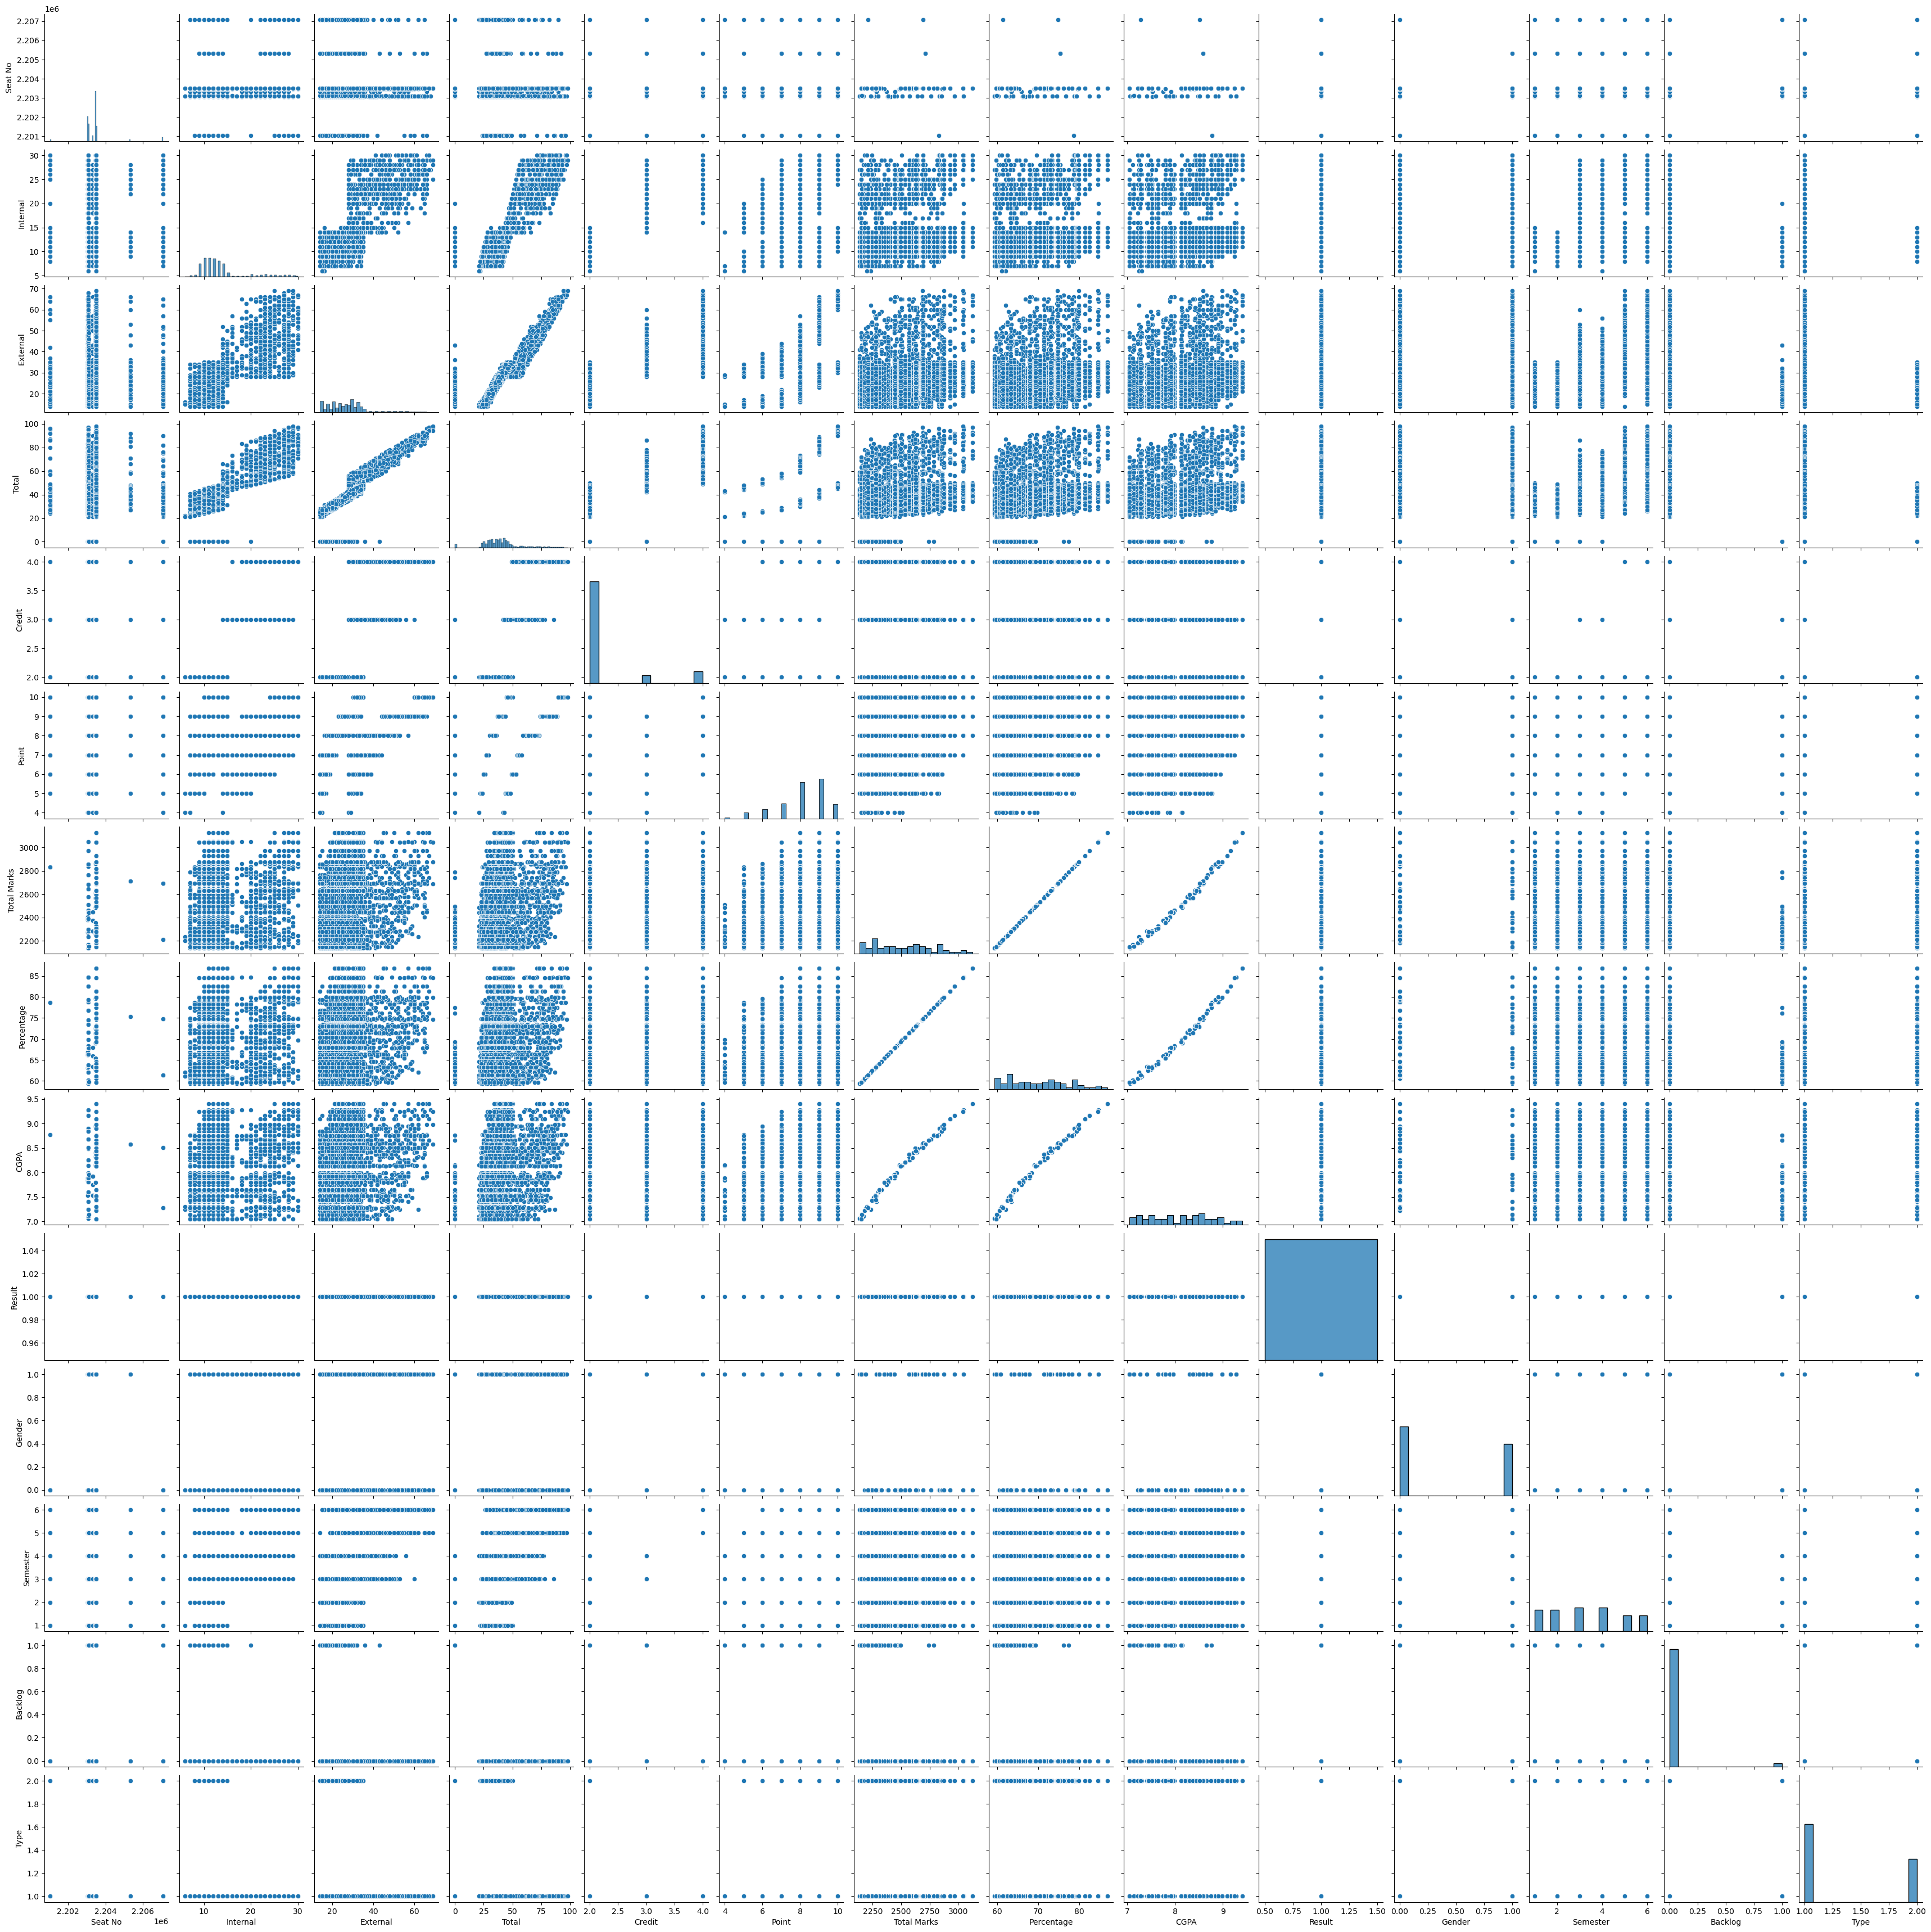

In [225]:
sns.pairplot(num_df)
plt.show()

In [226]:
num_df=num_df.drop(columns=['Seat No','Credit','Point','Total Marks','Result','CGPA','Gender','Semester','Percentage', 'Type','Total'],axis=1)

In [227]:
num_df

Internal  External  Backlog
0           12        26        0
1           12        24        0
2           12        19        0
3           10        20        0
4           11        26        0
...        ...       ...      ...
4283        12        26        0
4284        14        34        0
4285        14        33        0
4286        10        34        0
4287        14        32        0

[3905 rows x 3 columns]

In [228]:
num_df.corr()

Internal  External   Backlog
Internal  1.000000  0.748378 -0.107893
External  0.748378  1.000000 -0.139848
Backlog  -0.107893 -0.139848  1.000000

In [229]:
num_df.describe()

Internal    External      Backlog
count  3905.000000  3905.00000  3905.000000
mean     13.286044    27.46274     0.028425
std       4.838728    10.17567     0.166205
min       6.000000    14.00000     0.000000
25%      10.000000    20.00000     0.000000
50%      12.000000    27.00000     0.000000
75%      14.000000    32.00000     0.000000
max      30.000000    69.00000     1.000000

In [230]:
#data is imbalanced
df['Backlog'].value_counts()

Backlog
0    3794
1     111
Name: count, dtype: int64

In [231]:
num_df.shape

(3905, 3)

In [232]:
# Sample 111 rows of class 0
sampled_0 = num_df[num_df['Backlog'] == 0].sample(111, random_state=42)

# Get all rows of class 1
class_1 = num_df[num_df['Backlog'] == 1]

# Combine them
new_df = pd.concat([sampled_0, class_1])

# Shuffle the final data (optional)
new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

#check it data is balanced or not
print(new_df['Backlog'].value_counts())


Backlog
1    111
0    111
Name: count, dtype: int64


In [233]:
new_df.shape

(222, 3)

In [234]:
new_df

Internal  External  Backlog
0           9        24        1
1          10        18        1
2          11        24        0
3          10        19        1
4          13        21        1
..        ...       ...      ...
217        10        25        0
218         9        14        0
219        13        27        0
220        11        29        1
221        13        21        0

[222 rows x 3 columns]

In [235]:
x = num_df.drop('Backlog', axis=1)
y = num_df['Backlog']

In [236]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [237]:
# Split Data into Train and Test for 20% testing and 80% training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [238]:
#Scale Data
scaler = StandardScaler()
# Fit & Transform on Train Data
X_train_scaled = scaler.fit_transform(X_train) 
# Only Transform on Test Data
X_test_scaled = scaler.transform(X_test)        

In [239]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [240]:
y_pred = model.predict(X_test_scaled)

In [241]:
#Evaluate the model
print("accuracy_score :", accuracy_score(y_test, y_pred))
print("classification_report:\n",  classification_report(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

accuracy_score : 0.970550576184379
classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       760
           1       0.00      0.00      0.00        21

    accuracy                           0.97       781
   macro avg       0.49      0.50      0.49       781
weighted avg       0.95      0.97      0.96       781

confusion_matrix:
 [[758   2]
 [ 21   0]]


# lets try different models

In [243]:
from sklearn.linear_model import LogisticRegression

In [244]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [245]:
y_pred = model.predict(X_test_scaled)

In [246]:
print("accuracy_score :", accuracy_score(y_test, y_pred))
print("classification_report:\n",  classification_report(y_test, y_pred))
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))

accuracy_score : 0.9731113956466069
classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       760
           1       0.00      0.00      0.00        21

    accuracy                           0.97       781
   macro avg       0.49      0.50      0.49       781
weighted avg       0.95      0.97      0.96       781

confusion_matrix :
 [[760   0]
 [ 21   0]]


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [247]:
from xgboost import XGBClassifier

In [248]:
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [249]:
y_pred = model.predict(X_test_scaled)

In [250]:
print("accuracy_score :", accuracy_score(y_test, y_pred))
print("classification_report:\n",  classification_report(y_test, y_pred))
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))

accuracy_score : 0.970550576184379
classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       760
           1       0.00      0.00      0.00        21

    accuracy                           0.97       781
   macro avg       0.49      0.50      0.49       781
weighted avg       0.95      0.97      0.96       781

confusion_matrix :
 [[758   2]
 [ 21   0]]


In [251]:
from sklearn.neural_network import MLPClassifier

In [252]:
clf_model = MLPClassifier(random_state=42, max_iter=500)
clf_model.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [253]:
y_pred_clf = clf_model.predict(X_test_scaled)

In [254]:
print("accuracy_score :", accuracy_score(y_test, y_pred))
print("classification_report:\n",  classification_report(y_test, y_pred))
print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))

accuracy_score : 0.970550576184379
classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       760
           1       0.00      0.00      0.00        21

    accuracy                           0.97       781
   macro avg       0.49      0.50      0.49       781
weighted avg       0.95      0.97      0.96       781

confusion_matrix :
 [[758   2]
 [ 21   0]]


In [255]:
num_df

Internal  External  Backlog
0           12        26        0
1           12        24        0
2           12        19        0
3           10        20        0
4           11        26        0
...        ...       ...      ...
4283        12        26        0
4284        14        34        0
4285        14        33        0
4286        10        34        0
4287        14        32        0

[3905 rows x 3 columns]

# Let's try Regression model

In [257]:
num_df = df.select_dtypes(include=['int64','int32', 'float64'])
num_df

Seat No  Internal  External  Total  Credit  Point  Total Marks  \
0     2201036        12        26     38       2      9       2831.0   
1     2201036        12        24     36       2      8       2831.0   
2     2201036        12        19     31       2      8       2831.0   
3     2201036        10        20     30       2      8       2831.0   
4     2201036        11        26     37       2      9       2831.0   
...       ...       ...       ...    ...     ...    ...          ...   
4283  2207074        12        26     38       2      9       2693.0   
4284  2207074        14        34     48       2     10       2693.0   
4285  2207074        14        33     47       2     10       2693.0   
4286  2207074        10        34     44       2      9       2693.0   
4287  2207074        14        32     46       2     10       2693.0   

      Percentage  CGPA  Result  Gender  Semester  Backlog  Type  
0          78.64  8.77       1       0         1        0     1  
1          78.64  8.77       1       0         1        0     1  
2          78.64  8.77       1       0         1        0     1  
3          78.64  8.77       1       0         1        0     1  
4          78.64  8.77       1       0         1        0     1  
...          ...   ...     ...     ...       ...      ...   ...  
4283       74.81  8.51       1       0         5        0     2  
4284       74.81  8.51       1       0         5        0     2  
4285       74.81  8.51       1       0         5        0     2  
4286       74.81  8.51       1       0         5        0     1  
4287       74.81  8.51       1       0         5        0     2  

[3905 rows x 14 columns]

In [258]:
num_df=num_df.drop(columns=['Seat No','Point','Total Marks','Result','CGPA','Total'],axis=1)

In [259]:
num_df

Internal  External  Credit  Percentage  Gender  Semester  Backlog  Type
0           12        26       2       78.64       0         1        0     1
1           12        24       2       78.64       0         1        0     1
2           12        19       2       78.64       0         1        0     1
3           10        20       2       78.64       0         1        0     1
4           11        26       2       78.64       0         1        0     1
...        ...       ...     ...         ...     ...       ...      ...   ...
4283        12        26       2       74.81       0         5        0     2
4284        14        34       2       74.81       0         5        0     2
4285        14        33       2       74.81       0         5        0     2
4286        10        34       2       74.81       0         5        0     1
4287        14        32       2       74.81       0         5        0     2

[3905 rows x 8 columns]

In [260]:
num_df.describe()

Internal    External       Credit   Percentage       Gender  \
count  3905.000000  3905.00000  3905.000000  3905.000000  3905.000000   
mean     13.286044    27.46274     2.257618    70.195818     0.428425   
std       4.838728    10.17567     0.620029     7.226969     0.494914   
min       6.000000    14.00000     2.000000    59.360000     0.000000   
25%      10.000000    20.00000     2.000000    63.360000     0.000000   
50%      12.000000    27.00000     2.000000    69.610000     0.000000   
75%      14.000000    32.00000     2.000000    75.360000     1.000000   
max      30.000000    69.00000     4.000000    86.860000     1.000000   

          Semester      Backlog         Type  
count  3905.000000  3905.000000  3905.000000  
mean      3.306018     0.028425     1.354930  
std       1.632416     0.166205     0.478553  
min       1.000000     0.000000     1.000000  
25%       2.000000     0.000000     1.000000  
50%       3.000000     0.000000     1.000000  
75%       5.000000     0.000000     2.000000  
max       6.000000     1.000000     2.000000

In [261]:
num_df.isna().sum()

Internal      0
External      0
Credit        0
Percentage    0
Gender        0
Semester      0
Backlog       0
Type          0
dtype: int64

In [262]:
num_df.corr()

Internal  External    Credit  Percentage    Gender  Semester  \
Internal    1.000000  0.748378  0.887784    0.178547 -0.036747  0.430949   
External    0.748378  1.000000  0.743428    0.325543  0.020388  0.529985   
Credit      0.887784  0.743428  1.000000   -0.001441 -0.000831  0.431275   
Percentage  0.178547  0.325543 -0.001441    1.000000  0.009766 -0.000532   
Gender     -0.036747  0.020388 -0.000831    0.009766  1.000000 -0.000307   
Semester    0.430949  0.529985  0.431275   -0.000532 -0.000307  1.000000   
Backlog    -0.107893 -0.139848 -0.061135   -0.171337 -0.014185 -0.156689   
Type       -0.238102 -0.112165 -0.308240    0.000380  0.000219  0.170785   

             Backlog      Type  
Internal   -0.107893 -0.238102  
External   -0.139848 -0.112165  
Credit     -0.061135 -0.308240  
Percentage -0.171337  0.000380  
Gender     -0.014185  0.000219  
Semester   -0.156689  0.170785  
Backlog     1.000000 -0.094672  
Type       -0.094672  1.000000

In [263]:
#predict the percentage based on other columns

In [264]:
x = num_df.drop('Percentage', axis=1)
y = num_df['Percentage']

In [265]:
x.shape,y.shape

((3905, 7), (3905,))

In [266]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [267]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [268]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [269]:
model =RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [270]:
y_pred = model.predict(X_test_scaled)

In [271]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print("R2 Score:", r2_score(y_test, y_pred))
print('Note : The best accuracy is not our goal')

Mean Absolute Error (MAE): 4.757919746169656
Mean Squared Error (MSE): 36.60812167313179
Root Mean Squared Error (RMSE): 2.4597692134115863
R2 Score: 0.29716657500939414
Note : The best accuracy is not our goal


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [272]:
from xgboost import XGBRFRegressor

In [273]:
model = XGBRFRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...)

In [274]:
y_pred = model.predict(X_test_scaled)

In [275]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 4.760383613576657
Mean Squared Error (MSE): 33.9011198822411
Root Mean Squared Error (RMSE): 2.4129788273109893
R2 Score: 0.349137865892198


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [276]:
from sklearn.neural_network import MLPRegressor

In [277]:
reg_model = MLPRegressor(random_state=42, max_iter=500)
reg_model.fit(X_train_scaled, y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=500, random_state=42)

In [278]:
y_pred_reg = reg_model.predict(X_test_scaled)

In [279]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 4.760383613576657
Mean Squared Error (MSE): 33.9011198822411
Root Mean Squared Error (RMSE): 2.4129788273109893
R2 Score: 0.349137865892198


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [280]:
from sklearn.neighbors import KNeighborsRegressor

In [281]:
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=2)

In [282]:
knn_pred = knn_model.predict(X_test_scaled)

In [283]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 4.760383613576657
Mean Squared Error (MSE): 33.9011198822411
Root Mean Squared Error (RMSE): 2.4129788273109893
R2 Score: 0.349137865892198


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Lets used deep learning model for regression i.e Artificial Neural Network ANN

In [285]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [286]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
# Define ANN model
model = Sequential()
# 3 hidden layes
# 1st layer 128 neurans
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
#2nd 64 neurans
model.add(Dense(64, activation='relu'))
# 3rd layer 32 neurans
model.add(Dense(32, activation='relu'))
#dropout 20% neurans from the model because its reduce overfitting betwwen model
model.add(Dropout(0.2))
# Regression single output
model.add(Dense(1))  

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [288]:
model.compile(optimizer='adam', loss='mse')

In [289]:
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=0)

In [290]:
ann_pred = model.predict(X_test_scaled).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [291]:
print("MAE:", mean_absolute_error(y_test, ann_pred))
print("MSE:", mean_squared_error(y_test, ann_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ann_pred)))
print("R2 Score:", r2_score(y_test, ann_pred))


MAE: 4.679991435345248
MSE: 34.86769254075646
RMSE: 5.904887174261373
R2 Score: 0.3305807932799415


# Lets try some clustering algorithm i.e kmeans Clustering

In [293]:
from sklearn.cluster import KMeans

In [294]:
features = df[['Internal','External','Total']]

In [295]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [296]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

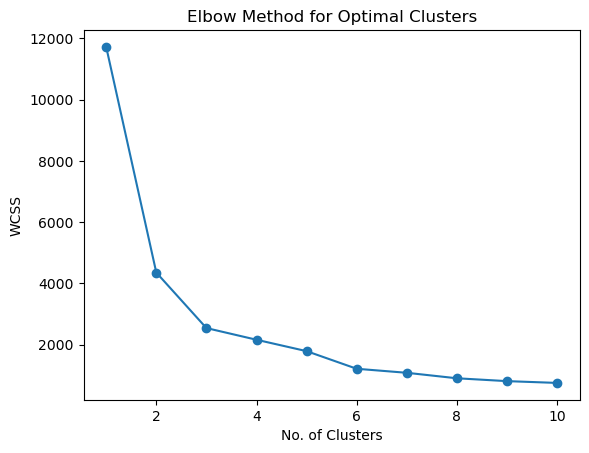

In [297]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [298]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [299]:
df['Cluster'] = clusters

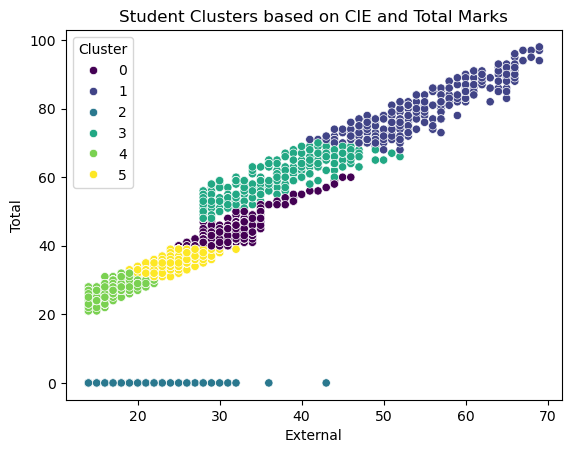

In [300]:
sns.scatterplot(data=df, x='External', y='Total', hue='Cluster', palette='viridis')
plt.title('Student Clusters based on CIE and Total Marks')
plt.show()

# Thank You